# Homework 3: Measuring and Comparing the Performance of Mutual Funds and Replicating the Portfolio Return

In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import datetime
import statsmodels.api as sm
%matplotlib inline

C:\Users\cl44343\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## HW3- A) Measuring the performance of mutual funds
 1) You will be given data on the monthly returns of two mutual funds managed by Yacktman Asset Management. (Data file “Mutual_Fund_Returns.csv” - tickers YACKX and YAFFX). Download the monthly Fama-French factors from Ken French's website and estimate the multifactor regression using the Fama-French factors. How well do the regressions explain the variation in the returns of each mutual fund? Explain what you observe about the beta coefficients. Comment on the alpha and Sharpe ratios.


## A.0. Load in the data

### A.0.1 Monthly mutual fund returns

In [2]:
fund_df = pd.read_csv('datasets/Mutual_Fund_Returns.csv')
fund_df['mret'] = fund_df['mret'] * 100
fund_df

,crsp_fundno,date,mtna,mret,mnav,ticker,tm
0,5270,31-Jan-00,10.1,-5.25304,14.79,APIMX,2000m1
1,5270,29-Feb-00,10.7,3.71873,15.34,APIMX,2000m2
2,5270,31-Mar-00,11.6,5.99739,16.26,APIMX,2000m3
3,5270,28-Apr-00,11.7,-4.12054,15.59,APIMX,2000m4
4,5270,31-May-00,11.4,-3.52790,15.04,APIMX,2000m5
5,5270,30-Jun-00,12.1,3.05851,15.50,APIMX,2000m6
6,5270,31-Jul-00,12.3,-2.96774,15.04,APIMX,2000m7
7,5270,31-Aug-00,15.9,9.10904,16.41,APIMX,2000m8
8,5270,29-Sep-00,14.9,-5.24071,15.55,APIMX,2000m9
9,5270,31-Oct-00,15.0,-7.58842,14.37,APIMX,2000m10


> 
- ***crsp_fundno*** : Unique identifier for fund
- ***mtna*** : Monthly Total Net Assets. Monthly TNA is equal to total assets minus total liabilities as of month-end. Reported in millions of dollars.
- ***mret*** : Total return per share as of month end. See note below for more details.
- ***mnav*** : Monthly value of the fund’s underlying assets (including cash) minus its liabilities (fees, expenses, etc.) divided by the number of shares outstanding. <p>
  http://www.crsp.com/products/documentation/monthly

date from end of the month to first of the month due to CRSP date matching

In [3]:
fund_df['date'] = '01' + fund_df['date'].str[2:]

In [4]:
fund_df.loc[np.isnan(fund_df['mtna']), 'mtna'] = 0
fund_df.loc[np.isnan(fund_df['mret']), 'mret'] = 0
fund_df.loc[np.isnan(fund_df['mnav']), 'mnav'] = 0

In [5]:
fund_df['date'] = pd.to_datetime(fund_df['date'])

In [6]:
fund_df

,crsp_fundno,date,mtna,mret,mnav,ticker,tm
0,5270,2000-01-01,10.1,-5.25304,14.79,APIMX,2000m1
1,5270,2000-02-01,10.7,3.71873,15.34,APIMX,2000m2
2,5270,2000-03-01,11.6,5.99739,16.26,APIMX,2000m3
3,5270,2000-04-01,11.7,-4.12054,15.59,APIMX,2000m4
4,5270,2000-05-01,11.4,-3.52790,15.04,APIMX,2000m5
5,5270,2000-06-01,12.1,3.05851,15.50,APIMX,2000m6
6,5270,2000-07-01,12.3,-2.96774,15.04,APIMX,2000m7
7,5270,2000-08-01,15.9,9.10904,16.41,APIMX,2000m8
8,5270,2000-09-01,14.9,-5.24071,15.55,APIMX,2000m9
9,5270,2000-10-01,15.0,-7.58842,14.37,APIMX,2000m10


#### two mutual funds managed by Yacktman Asset Management. (Data file “Mutual_Fund_Returns.csv” - tickers YACKX and YAFFX)

In [7]:
yackx_df = fund_df.loc[fund_df['ticker'] == 'YACKX']
yaffx_df = fund_df.loc[fund_df['ticker'] == 'YAFFX']

In [8]:
yackx_df

,crsp_fundno,date,mtna,mret,mnav,ticker,tm
2160,32555,2000-01-01,109.4,-7.02128,8.74,YACKX,2000m1
2161,32555,2000-02-01,68.1,-7.55149,8.08,YACKX,2000m2
2162,32555,2000-03-01,67.6,6.18812,8.56,YACKX,2000m3
2163,32555,2000-04-01,62.5,-3.62150,8.25,YACKX,2000m4
2164,32555,2000-05-01,64.2,3.27273,8.52,YACKX,2000m5
2165,32555,2000-06-01,65.0,5.75117,9.01,YACKX,2000m6
2166,32555,2000-07-01,62.3,-1.33185,8.89,YACKX,2000m7
2167,32555,2000-08-01,67.7,6.41170,9.46,YACKX,2000m8
2168,32555,2000-09-01,63.1,0.31712,9.49,YACKX,2000m9
2169,32555,2000-10-01,67.6,8.42993,10.29,YACKX,2000m10


In [9]:
yaffx_df

,crsp_fundno,date,mtna,mret,mnav,ticker,tm
2376,32556,2000-01-01,9.0,-5.02232,8.51,YAFFX,2000m1
2377,32556,2000-02-01,6.5,-11.04583,7.57,YAFFX,2000m2
2378,32556,2000-03-01,7.0,6.07612,8.00,YAFFX,2000m3
2379,32556,2000-04-01,6.5,-4.75000,7.62,YAFFX,2000m4
2380,32556,2000-05-01,6.5,2.49344,7.81,YAFFX,2000m5
2381,32556,2000-06-01,6.6,2.56082,8.01,YAFFX,2000m6
2382,32556,2000-07-01,6.4,-1.24844,7.91,YAFFX,2000m7
2383,32556,2000-08-01,7.0,9.73451,8.68,YAFFX,2000m8
2384,32556,2000-09-01,7.0,0.92166,8.76,YAFFX,2000m9
2385,32556,2000-10-01,7.5,8.90411,9.54,YAFFX,2000m10


### A.0.2 Monthly Fama French Factor Return

In [10]:
ff3factor_df = pd.read_csv('datasets/Fama-French-3-Factor-Model-Monthly-Data.CSV')

In [13]:
ff3factor_df.columns = ['date', 'Mkt-RF', 'SMB', 'HML', 'RF']

In [15]:
ff3factor_df.date = ff3factor_df.date.map(lambda x: pd.to_datetime(str(x)[0:4] + "-" + str(x)[4:]))
ff3factor_df

,date,Mkt-RF,SMB,HML,RF
0,1926-07-01,2.96,-2.30,-2.87,0.22
1,1926-08-01,2.64,-1.40,4.19,0.25
2,1926-09-01,0.36,-1.32,0.01,0.23
3,1926-10-01,-3.24,0.04,0.51,0.32
4,1926-11-01,2.53,-0.20,-0.35,0.31
5,1926-12-01,2.62,-0.04,-0.02,0.28
6,1927-01-01,-0.06,-0.56,4.83,0.25
7,1927-02-01,4.18,-0.10,3.17,0.26
8,1927-03-01,0.13,-1.60,-2.67,0.30
9,1927-04-01,0.46,0.43,0.60,0.25


In [16]:
yackx_df = pd.merge(ff3factor_df, yackx_df, on='date', how='inner')

In [17]:
yaffx_df = pd.merge(ff3factor_df, yaffx_df, on='date', how='inner')

In [18]:
yackx_df

,date,Mkt-RF,SMB,HML,RF,crsp_fundno,mtna,mret,mnav,ticker,tm
0,2000-01-01,-4.74,5.05,-0.45,0.41,32555,109.4,-7.02128,8.74,YACKX,2000m1
1,2000-02-01,2.45,22.14,-10.57,0.43,32555,68.1,-7.55149,8.08,YACKX,2000m2
2,2000-03-01,5.20,-17.28,7.94,0.47,32555,67.6,6.18812,8.56,YACKX,2000m3
3,2000-04-01,-6.40,-7.71,8.56,0.46,32555,62.5,-3.62150,8.25,YACKX,2000m4
4,2000-05-01,-4.42,-5.01,2.43,0.50,32555,64.2,3.27273,8.52,YACKX,2000m5
5,2000-06-01,4.64,14.03,-10.10,0.40,32555,65.0,5.75117,9.01,YACKX,2000m6
6,2000-07-01,-2.51,-2.79,8.14,0.48,32555,62.3,-1.33185,8.89,YACKX,2000m7
7,2000-08-01,7.03,-1.13,-0.67,0.50,32555,67.7,6.41170,9.46,YACKX,2000m8
8,2000-09-01,-5.45,-1.39,6.25,0.51,32555,63.1,0.31712,9.49,YACKX,2000m9
9,2000-10-01,-2.76,-3.76,5.52,0.56,32555,67.6,8.42993,10.29,YACKX,2000m10


In [19]:
yaffx_df

,date,Mkt-RF,SMB,HML,RF,crsp_fundno,mtna,mret,mnav,ticker,tm
0,2000-01-01,-4.74,5.05,-0.45,0.41,32556,9.0,-5.02232,8.51,YAFFX,2000m1
1,2000-02-01,2.45,22.14,-10.57,0.43,32556,6.5,-11.04583,7.57,YAFFX,2000m2
2,2000-03-01,5.20,-17.28,7.94,0.47,32556,7.0,6.07612,8.00,YAFFX,2000m3
3,2000-04-01,-6.40,-7.71,8.56,0.46,32556,6.5,-4.75000,7.62,YAFFX,2000m4
4,2000-05-01,-4.42,-5.01,2.43,0.50,32556,6.5,2.49344,7.81,YAFFX,2000m5
5,2000-06-01,4.64,14.03,-10.10,0.40,32556,6.6,2.56082,8.01,YAFFX,2000m6
6,2000-07-01,-2.51,-2.79,8.14,0.48,32556,6.4,-1.24844,7.91,YAFFX,2000m7
7,2000-08-01,7.03,-1.13,-0.67,0.50,32556,7.0,9.73451,8.68,YAFFX,2000m8
8,2000-09-01,-5.45,-1.39,6.25,0.51,32556,7.0,0.92166,8.76,YAFFX,2000m9
9,2000-10-01,-2.76,-3.76,5.52,0.56,32556,7.5,8.90411,9.54,YAFFX,2000m10


## A.1. Regression & Sharpe Ratio of YACKX and YAFFX

Sharpe Ratio Function

In [20]:
def sharpe_ratio(df):
    df['return_excess']        = (df['mret']/100   - df['RF']/100)
    df["cum_return"]           = (df["mret"]+1).cumprod()
    df["cum_return_excess"]    = (df["return_excess"]+1).cumprod()
    df_annual_ret              = (df["mret"]+1         ).cumprod().resample('A').agg('last').pct_change()
    df_annual_ret_excess       = (df["return_excess"]+1).cumprod().resample('A').agg('last').pct_change()
    df_annual_ret_excess_mean  = df_annual_ret_excess.mean()
    df_annual_volatility       = df["return_excess"].std() * np.sqrt(12)
    df_sharpe_ratio            = df_annual_ret_excess_mean / df_annual_volatility  
    return df_sharpe_ratio

Regression function for alpha and beta

In [21]:
def regression(df) :
    # split dependent and independent variable
    y_df = df["mret"]
    X_df = df.iloc[:, [1,2,3]]

    # Add a constant to the independent value
    X1_df = sm.add_constant(X_df)

    # make regression model 
    model_df = sm.OLS(y_df, X1_df)

    # fit model and print results
    results_df = model_df.fit()
      
    fig = plt.figure(figsize=(12,8))
    fig = sm.graphics.plot_partregress_grid(results_df, fig = fig)
    plt.show()
    
    return print(results_df.summary())

### A.1.1 YACKX fund

#### A.1.1.1 Alpha and beta

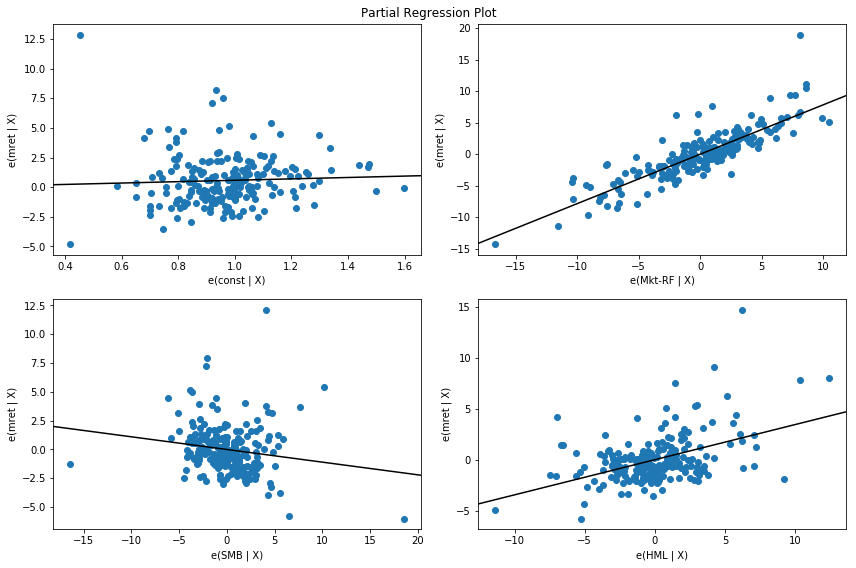

                            OLS Regression Results                            
Dep. Variable:                   mret   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     196.2
Date:                Sun, 15 Apr 2018   Prob (F-statistic):           6.87e-61
Time:                        11:35:54   Log-Likelihood:                -465.09
No. Observations:                 216   AIC:                             938.2
Df Residuals:                     212   BIC:                             951.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5855      0.145      4.030      0.0

In [22]:
regression(yackx_df)

#### A.1.1.2 Sharpe Ratio

In [23]:
yackx_df.index=pd.DatetimeIndex(yackx_df['date'])

In [24]:
sharpe_ratio(yackx_df)

0.8151189788201636

### A.1.2 YAFFX Fund

#### A.1.2.1 Alpha and beta

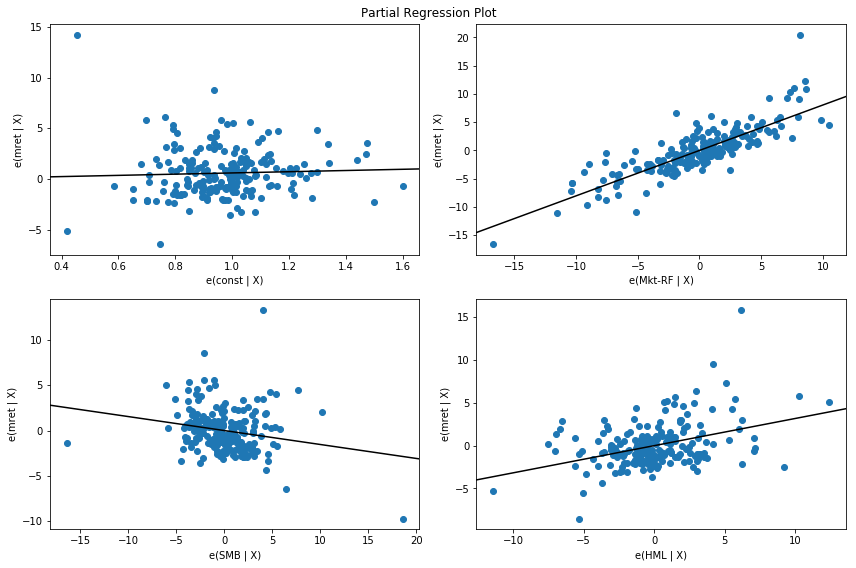

                            OLS Regression Results                            
Dep. Variable:                   mret   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     161.3
Date:                Sun, 15 Apr 2018   Prob (F-statistic):           1.85e-54
Time:                        11:35:56   Log-Likelihood:                -489.60
No. Observations:                 216   AIC:                             987.2
Df Residuals:                     212   BIC:                             1001.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5996      0.163      3.685      0.0

In [25]:
regression(yaffx_df)

#### A.1.2.2 Sharpe Ratio

In [26]:
yaffx_df.index=pd.DatetimeIndex(yaffx_df['date'])

In [27]:
sharpe_ratio(yaffx_df)  

0.8008826413839923

# HW3 - A) Measuring the performance of mutual funds
2) The data set also includes the monthly returns for 10 other mutual funds. Estimate the risk adjusted performance of these funds and compare them to the Yacktman funds. 

10 other mutual funds ticker : ['APIMX', 'BPEQX', 'FFFEX', 'FMTIX', 'FSTMX', 'GWETX', 'NBGUX', 'SWTSX', 'TVAFX', 'VADAX' ]

# A.2. Other mutual funds risk adjusted performance

## A.2.1 creating Data Frame

In [28]:
apimx_df = fund_df.loc[fund_df['ticker'] == 'APIMX']
bpeqx_df = fund_df.loc[fund_df['ticker'] == 'BPEQX']
fffex_df = fund_df.loc[fund_df['ticker'] == 'FFFEX']
fmtix_df = fund_df.loc[fund_df['ticker'] == 'FMTIX']
fstmx_df = fund_df.loc[fund_df['ticker'] == 'FSTMX']
gwetx_df = fund_df.loc[fund_df['ticker'] == 'GWETX']
nbgux_df = fund_df.loc[fund_df['ticker'] == 'NBGUX']
swtsx_df = fund_df.loc[fund_df['ticker'] == 'SWTSX']
tvafx_df = fund_df.loc[fund_df['ticker'] == 'TVAFX']
vadax_df = fund_df.loc[fund_df['ticker'] == 'VADAX']

In [29]:
apimx_df = pd.merge(ff3factor_df, apimx_df, on='date', how='inner')
bpeqx_df = pd.merge(ff3factor_df, bpeqx_df, on='date', how='inner')
fffex_df = pd.merge(ff3factor_df, fffex_df, on='date', how='inner')
fmtix_df = pd.merge(ff3factor_df, fmtix_df, on='date', how='inner')
fstmx_df = pd.merge(ff3factor_df, fstmx_df, on='date', how='inner')
gwetx_df = pd.merge(ff3factor_df, gwetx_df, on='date', how='inner')
nbgux_df = pd.merge(ff3factor_df, nbgux_df, on='date', how='inner')
swtsx_df = pd.merge(ff3factor_df, swtsx_df, on='date', how='inner')
tvafx_df = pd.merge(ff3factor_df, tvafx_df, on='date', how='inner')
vadax_df = pd.merge(ff3factor_df, vadax_df, on='date', how='inner')

## A.2.2. Regression & Sharpe Ratio

### A.2.2.1 Alpha and beta

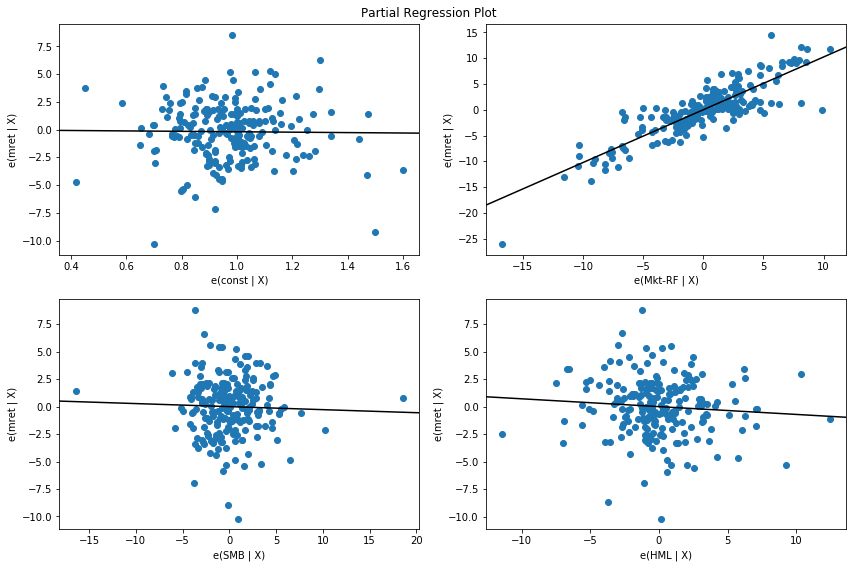

                            OLS Regression Results                            
Dep. Variable:                   mret   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     203.8
Date:                Sun, 15 Apr 2018   Prob (F-statistic):           3.48e-62
Time:                        11:36:02   Log-Likelihood:                -513.80
No. Observations:                 216   AIC:                             1036.
Df Residuals:                     212   BIC:                             1049.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1897      0.182     -1.042      0.2

In [30]:
regression(apimx_df)

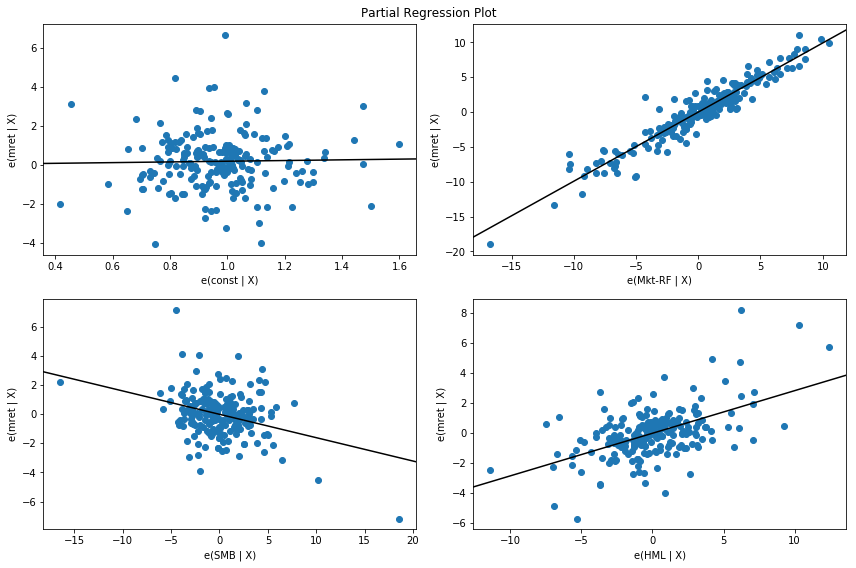

                            OLS Regression Results                            
Dep. Variable:                   mret   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     651.6
Date:                Sun, 15 Apr 2018   Prob (F-statistic):          1.10e-106
Time:                        11:36:06   Log-Likelihood:                -380.39
No. Observations:                 216   AIC:                             768.8
Df Residuals:                     212   BIC:                             782.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1784      0.098      1.818      0.0

In [31]:
regression(bpeqx_df)

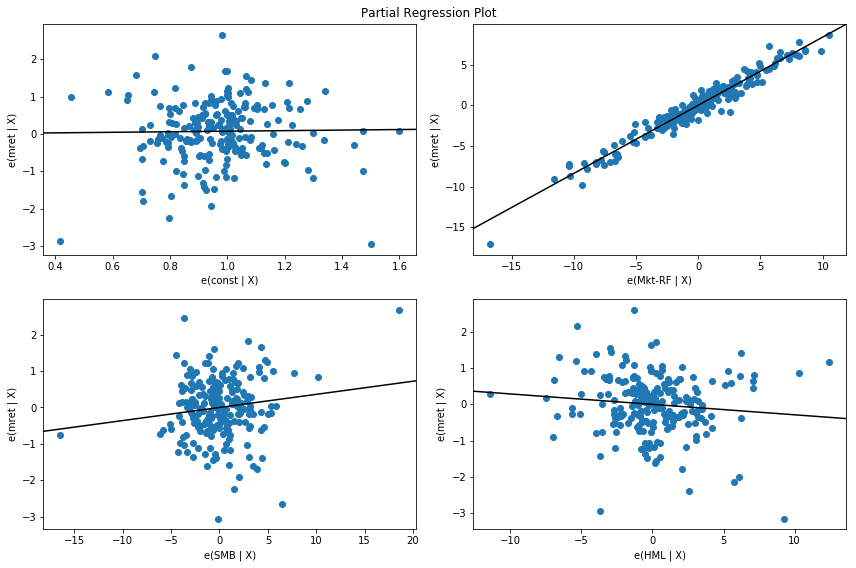

                            OLS Regression Results                            
Dep. Variable:                   mret   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     1457.
Date:                Sun, 15 Apr 2018   Prob (F-statistic):          3.57e-141
Time:                        11:36:09   Log-Likelihood:                -260.55
No. Observations:                 216   AIC:                             529.1
Df Residuals:                     212   BIC:                             542.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0741      0.056      1.314      0.1

In [32]:
regression(fffex_df)

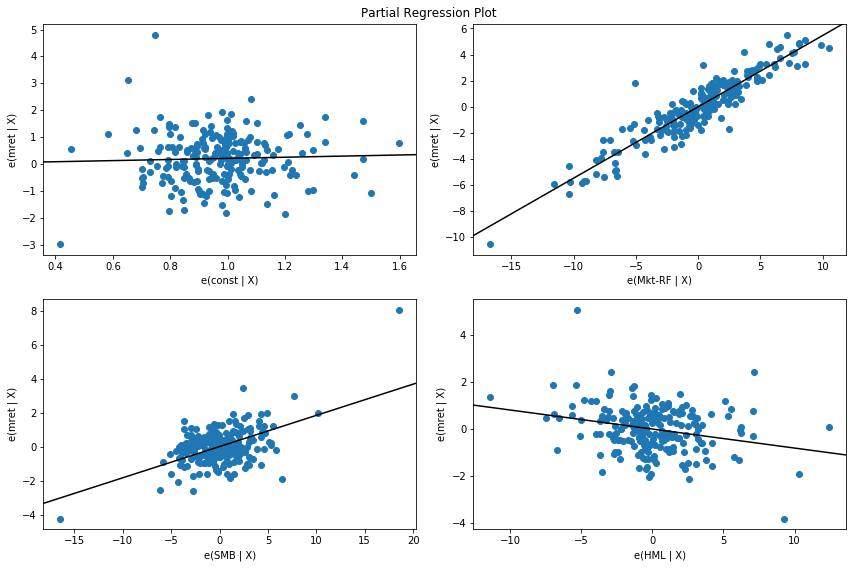

                            OLS Regression Results                            
Dep. Variable:                   mret   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     568.8
Date:                Sun, 15 Apr 2018   Prob (F-statistic):          4.39e-101
Time:                        11:36:12   Log-Likelihood:                -290.67
No. Observations:                 216   AIC:                             589.3
Df Residuals:                     212   BIC:                             602.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2090      0.065      3.227      0.0

In [33]:
regression(fmtix_df)

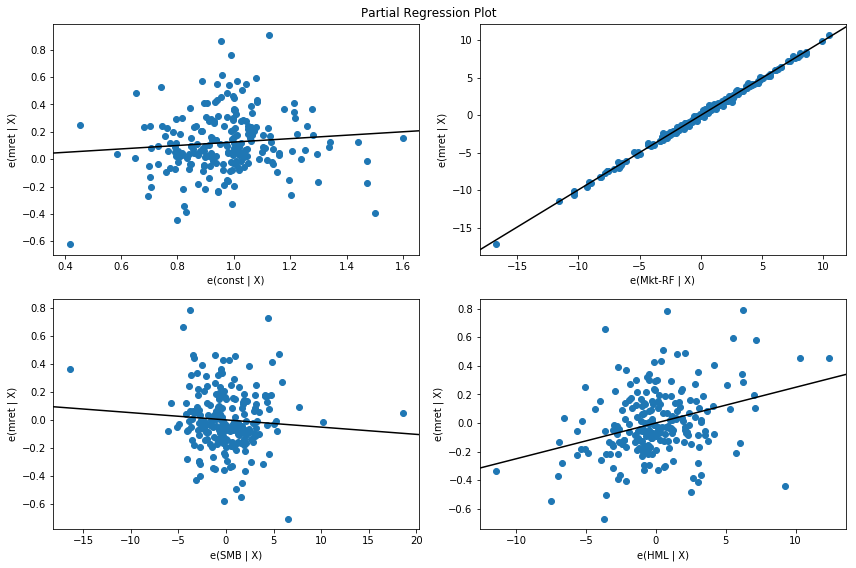

                            OLS Regression Results                            
Dep. Variable:                   mret   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 2.689e+04
Date:                Sun, 15 Apr 2018   Prob (F-statistic):          2.68e-273
Time:                        11:36:14   Log-Likelihood:                 20.437
No. Observations:                 216   AIC:                            -32.87
Df Residuals:                     212   BIC:                            -19.37
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1252      0.015      8.159      0.0

In [34]:
regression(fstmx_df)

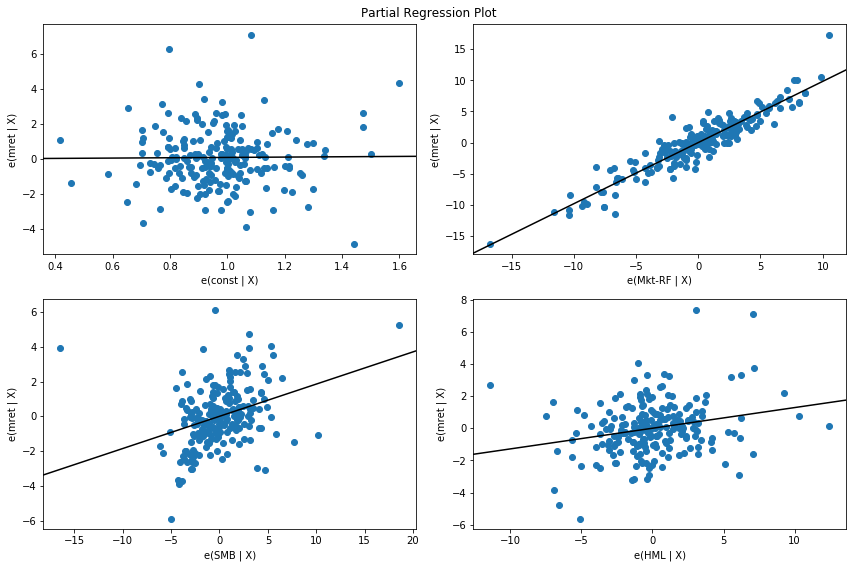

                            OLS Regression Results                            
Dep. Variable:                   mret   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     547.7
Date:                Sun, 15 Apr 2018   Prob (F-statistic):           1.53e-99
Time:                        11:36:15   Log-Likelihood:                -407.88
No. Observations:                 216   AIC:                             823.8
Df Residuals:                     212   BIC:                             837.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0944      0.111      0.847      0.3

In [35]:
regression(gwetx_df)

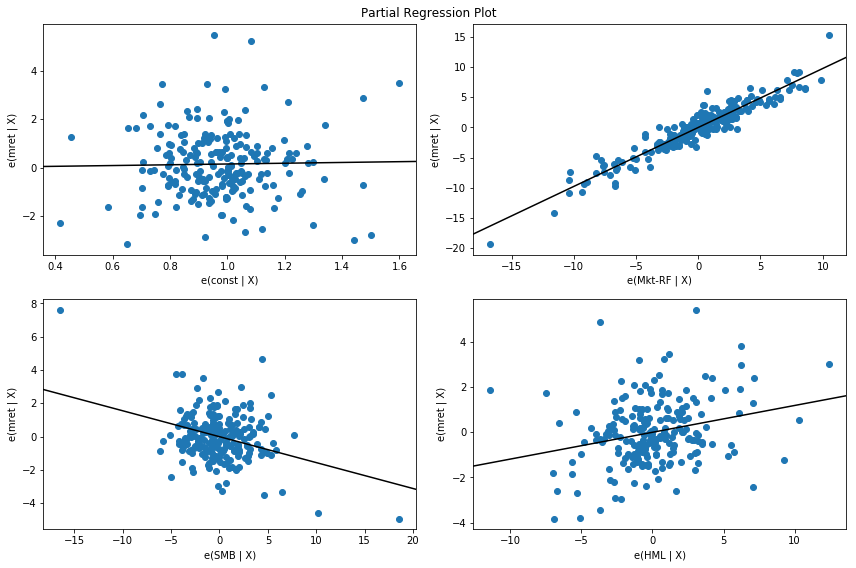

                            OLS Regression Results                            
Dep. Variable:                   mret   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     648.6
Date:                Sun, 15 Apr 2018   Prob (F-statistic):          1.69e-106
Time:                        11:36:15   Log-Likelihood:                -374.38
No. Observations:                 216   AIC:                             756.8
Df Residuals:                     212   BIC:                             770.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1592      0.095      1.668      0.0

In [36]:
regression(nbgux_df)

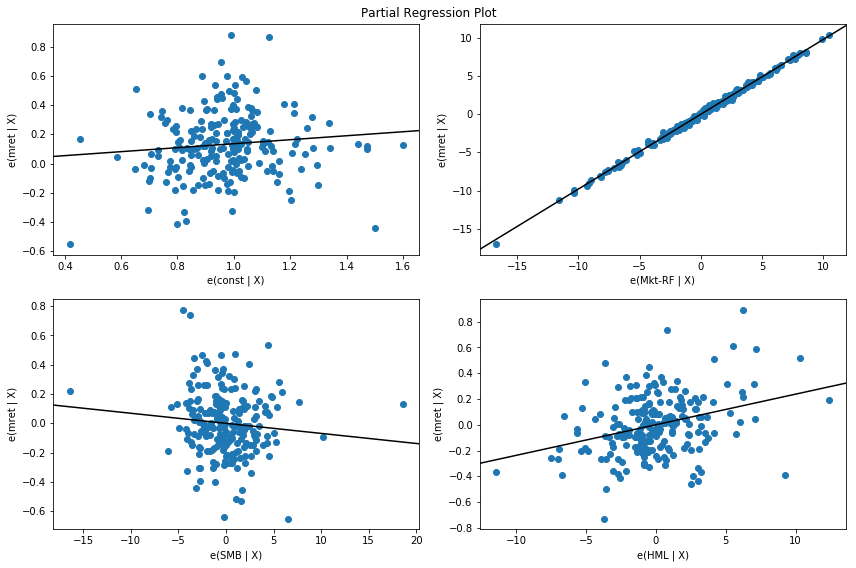

                            OLS Regression Results                            
Dep. Variable:                   mret   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 2.710e+04
Date:                Sun, 15 Apr 2018   Prob (F-statistic):          1.18e-273
Time:                        11:36:16   Log-Likelihood:                 23.984
No. Observations:                 216   AIC:                            -39.97
Df Residuals:                     212   BIC:                            -26.47
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1361      0.015      9.017      0.0

In [37]:
regression(swtsx_df)

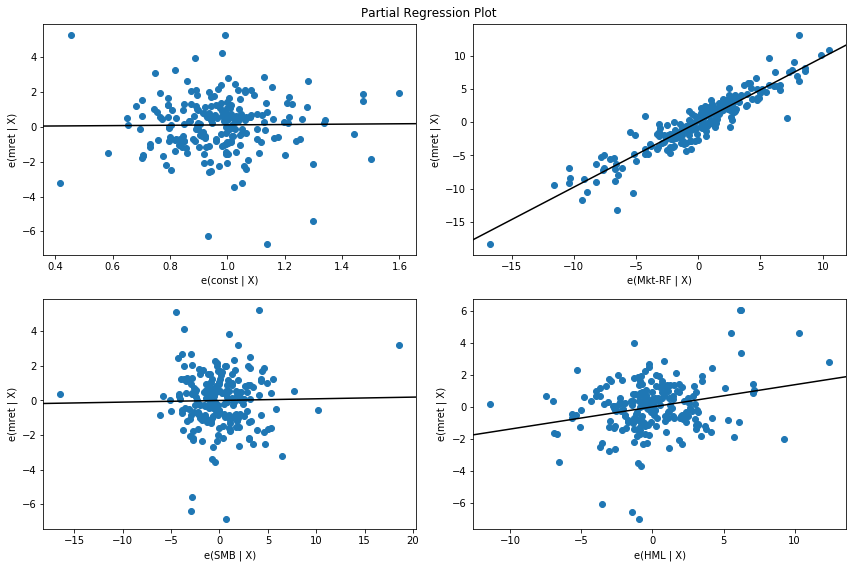

                            OLS Regression Results                            
Dep. Variable:                   mret   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     494.1
Date:                Sun, 15 Apr 2018   Prob (F-statistic):           2.27e-95
Time:                        11:36:17   Log-Likelihood:                -408.67
No. Observations:                 216   AIC:                             825.3
Df Residuals:                     212   BIC:                             838.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1050      0.112      0.938      0.3

In [38]:
regression(tvafx_df)

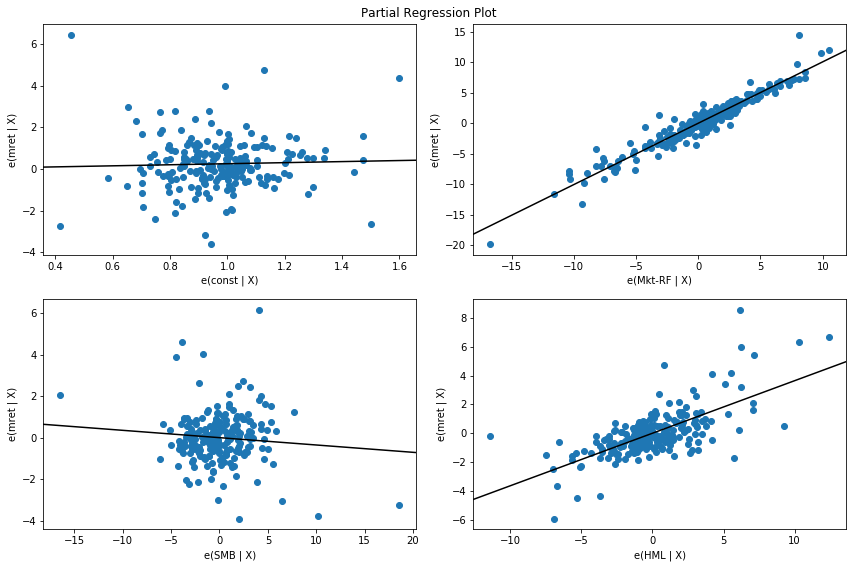

                            OLS Regression Results                            
Dep. Variable:                   mret   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     938.8
Date:                Sun, 15 Apr 2018   Prob (F-statistic):          4.30e-122
Time:                        11:36:18   Log-Likelihood:                -349.13
No. Observations:                 216   AIC:                             706.3
Df Residuals:                     212   BIC:                             719.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2536      0.085      2.986      0.0

In [39]:
regression(vadax_df)

### A.2.2.2 Sharpe Ratio

In [40]:
apimx_df.index=pd.DatetimeIndex(apimx_df['date'])
bpeqx_df.index=pd.DatetimeIndex(bpeqx_df['date'])
fffex_df.index=pd.DatetimeIndex(fffex_df['date'])
fmtix_df.index=pd.DatetimeIndex(fmtix_df['date'])
fstmx_df.index=pd.DatetimeIndex(fstmx_df['date'])
gwetx_df.index=pd.DatetimeIndex(gwetx_df['date'])
nbgux_df.index=pd.DatetimeIndex(nbgux_df['date'])
swtsx_df.index=pd.DatetimeIndex(swtsx_df['date'])
tvafx_df.index=pd.DatetimeIndex(tvafx_df['date'])
vadax_df.index=pd.DatetimeIndex(vadax_df['date'])

In [41]:
sharpe_ratio(apimx_df)

0.18646806092617255

In [42]:
sharpe_ratio(bpeqx_df)

0.47289078097333864

In [43]:
sharpe_ratio(fffex_df)

0.39284085925297235

In [44]:
sharpe_ratio(fmtix_df)

0.5044650088798937

In [45]:
sharpe_ratio(fstmx_df)

0.4791624619933311

In [46]:
sharpe_ratio(gwetx_df)

0.41281799387599394

In [47]:
sharpe_ratio(nbgux_df)

0.4637896723753433

In [48]:
sharpe_ratio(swtsx_df)

0.4869147825981511

In [49]:
sharpe_ratio(tvafx_df)

0.43997049583604814

In [50]:
sharpe_ratio(vadax_df)

0.5716980859115735

# HW3 - A) Measuring the performance of mutual funds
3) Do steps (1) and (2) separately for the periods before and after January 2009. Is the relative performance different over the two time periods?

first_half is between 2000-01~2008-12, second_half is between 2009-01 and 2017-12

## A.3.1. Creating DataFrame 

### A.3.1.1 Divide the date with first_half and second_half

In [51]:
# set a default value
fund_df['s_period'] = 0
# set values based on multiple conditions
fund_df.loc[(fund_df['date']>='2000-01-01') & (fund_df['date']<='2008-12-01'), 's_period'] = 1
fund_df.loc[(fund_df['date']>='2009-01-01') & (fund_df['date']<='2017-12-01'), 's_period'] = 2

In [52]:
fund_df

,crsp_fundno,date,mtna,mret,mnav,ticker,tm,s_period
0,5270,2000-01-01,10.1,-5.25304,14.79,APIMX,2000m1,1
1,5270,2000-02-01,10.7,3.71873,15.34,APIMX,2000m2,1
2,5270,2000-03-01,11.6,5.99739,16.26,APIMX,2000m3,1
3,5270,2000-04-01,11.7,-4.12054,15.59,APIMX,2000m4,1
4,5270,2000-05-01,11.4,-3.52790,15.04,APIMX,2000m5,1
5,5270,2000-06-01,12.1,3.05851,15.50,APIMX,2000m6,1
6,5270,2000-07-01,12.3,-2.96774,15.04,APIMX,2000m7,1
7,5270,2000-08-01,15.9,9.10904,16.41,APIMX,2000m8,1
8,5270,2000-09-01,14.9,-5.24071,15.55,APIMX,2000m9,1
9,5270,2000-10-01,15.0,-7.58842,14.37,APIMX,2000m10,1


### A.3.1.2 Creating each Data Frame

In [53]:
apimx_df_first  = fund_df.loc[(fund_df['ticker'] == 'APIMX')&(fund_df['s_period']==1)]
apimx_df_second = fund_df.loc[(fund_df['ticker'] == 'APIMX')&(fund_df['s_period']==2)]
bpeqx_df_first  = fund_df.loc[(fund_df['ticker'] == 'BPEQX')&(fund_df['s_period']==1)]
bpeqx_df_second = fund_df.loc[(fund_df['ticker'] == 'BPEQX')&(fund_df['s_period']==2)]
fffex_df_first  = fund_df.loc[(fund_df['ticker'] == 'FFFEX')&(fund_df['s_period']==1)]
fffex_df_second = fund_df.loc[(fund_df['ticker'] == 'FFFEX')&(fund_df['s_period']==2)]
fmtix_df_first  = fund_df.loc[(fund_df['ticker'] == 'FMTIX')&(fund_df['s_period']==1)]
fmtix_df_second = fund_df.loc[(fund_df['ticker'] == 'FMTIX')&(fund_df['s_period']==2)]
fstmx_df_first  = fund_df.loc[(fund_df['ticker'] == 'FSTMX')&(fund_df['s_period']==1)]
fstmx_df_second = fund_df.loc[(fund_df['ticker'] == 'FSTMX')&(fund_df['s_period']==2)]
gwetx_df_first  = fund_df.loc[(fund_df['ticker'] == 'GWETX')&(fund_df['s_period']==1)]
gwetx_df_second = fund_df.loc[(fund_df['ticker'] == 'GWETX')&(fund_df['s_period']==2)]
nbgux_df_first  = fund_df.loc[(fund_df['ticker'] == 'NBGUX')&(fund_df['s_period']==1)]
nbgux_df_second = fund_df.loc[(fund_df['ticker'] == 'NBGUX')&(fund_df['s_period']==2)]
swtsx_df_first  = fund_df.loc[(fund_df['ticker'] == 'SWTSX')&(fund_df['s_period']==1)]
swtsx_df_second = fund_df.loc[(fund_df['ticker'] == 'SWTSX')&(fund_df['s_period']==2)]
tvafx_df_first  = fund_df.loc[(fund_df['ticker'] == 'TVAFX')&(fund_df['s_period']==1)]
tvafx_df_second = fund_df.loc[(fund_df['ticker'] == 'TVAFX')&(fund_df['s_period']==2)]
vadax_df_first  = fund_df.loc[(fund_df['ticker'] == 'VADAX')&(fund_df['s_period']==1)]
vadax_df_second = fund_df.loc[(fund_df['ticker'] == 'VADAX')&(fund_df['s_period']==2)]
yackx_df_first  = fund_df.loc[(fund_df['ticker'] == 'YACKX')&(fund_df['s_period']==1)]
yackx_df_second = fund_df.loc[(fund_df['ticker'] == 'YACKX')&(fund_df['s_period']==2)]
yaffx_df_first  = fund_df.loc[(fund_df['ticker'] == 'YAFFX')&(fund_df['s_period']==1)]
yaffx_df_second = fund_df.loc[(fund_df['ticker'] == 'YAFFX')&(fund_df['s_period']==2)]

In [54]:
apimx_df_first  = pd.merge(ff3factor_df, apimx_df_first,  on='date', how='inner')
apimx_df_second = pd.merge(ff3factor_df, apimx_df_second, on='date', how='inner')
bpeqx_df_first  = pd.merge(ff3factor_df, bpeqx_df_first,  on='date', how='inner')
bpeqx_df_second = pd.merge(ff3factor_df, bpeqx_df_second, on='date', how='inner')
fffex_df_first  = pd.merge(ff3factor_df, fffex_df_first,  on='date', how='inner')
fffex_df_second = pd.merge(ff3factor_df, fffex_df_second, on='date', how='inner')
fmtix_df_first  = pd.merge(ff3factor_df, fmtix_df_first,  on='date', how='inner')
fmtix_df_second = pd.merge(ff3factor_df, fmtix_df_second, on='date', how='inner')
fstmx_df_first  = pd.merge(ff3factor_df, fstmx_df_first,  on='date', how='inner')
fstmx_df_second = pd.merge(ff3factor_df, fstmx_df_second, on='date', how='inner')
gwetx_df_first  = pd.merge(ff3factor_df, gwetx_df_first,  on='date', how='inner')
gwetx_df_second = pd.merge(ff3factor_df, gwetx_df_second, on='date', how='inner')
nbgux_df_first  = pd.merge(ff3factor_df, nbgux_df_first,  on='date', how='inner')
nbgux_df_second = pd.merge(ff3factor_df, nbgux_df_second, on='date', how='inner')
swtsx_df_first  = pd.merge(ff3factor_df, swtsx_df_first,  on='date', how='inner')
swtsx_df_second = pd.merge(ff3factor_df, swtsx_df_second, on='date', how='inner')
tvafx_df_first  = pd.merge(ff3factor_df, tvafx_df_first,  on='date', how='inner')
tvafx_df_second = pd.merge(ff3factor_df, tvafx_df_second, on='date', how='inner')
vadax_df_first  = pd.merge(ff3factor_df, vadax_df_first,  on='date', how='inner')
vadax_df_second = pd.merge(ff3factor_df, vadax_df_second, on='date', how='inner')
yackx_df_first  = pd.merge(ff3factor_df, yackx_df_first,  on='date', how='inner')
yackx_df_second = pd.merge(ff3factor_df, yackx_df_second, on='date', how='inner')
yaffx_df_first  = pd.merge(ff3factor_df, yaffx_df_first,  on='date', how='inner')
yaffx_df_second = pd.merge(ff3factor_df, yaffx_df_second, on='date', how='inner')

## A.3.2. Regression & Sharpe Ratio

### A.3.2.1 Alpha and Beta

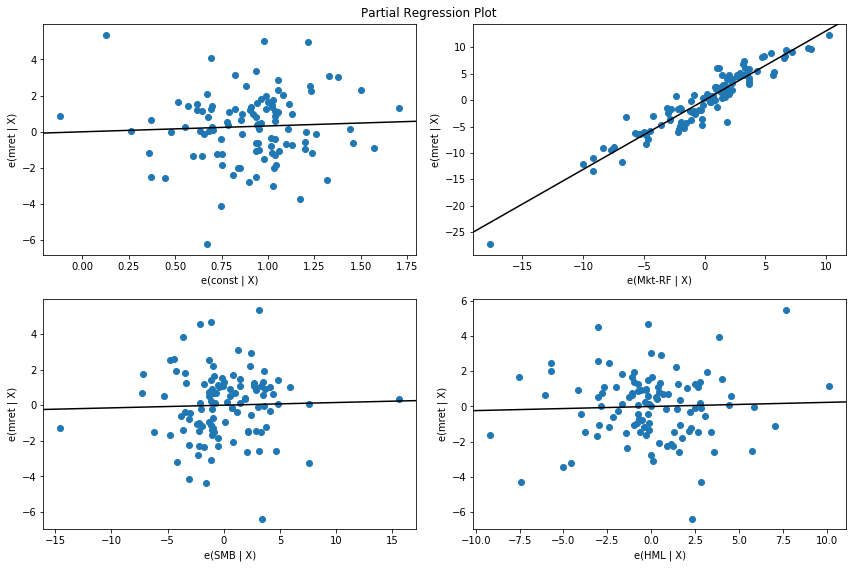

                            OLS Regression Results                            
Dep. Variable:                   mret   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     341.4
Date:                Sun, 15 Apr 2018   Prob (F-statistic):           1.14e-53
Time:                        11:36:38   Log-Likelihood:                -222.30
No. Observations:                 108   AIC:                             452.6
Df Residuals:                     104   BIC:                             463.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3237      0.195      1.660      0.1

In [55]:
regression(apimx_df_first)

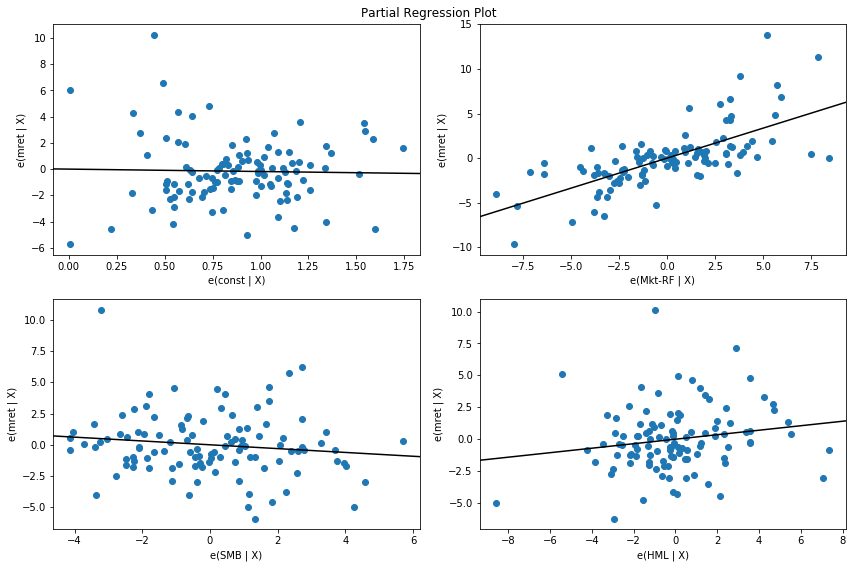

                            OLS Regression Results                            
Dep. Variable:                   mret   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     44.15
Date:                Sun, 15 Apr 2018   Prob (F-statistic):           1.74e-18
Time:                        11:36:40   Log-Likelihood:                -249.95
No. Observations:                 108   AIC:                             507.9
Df Residuals:                     104   BIC:                             518.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1829      0.256     -0.713      0.4

In [56]:
regression(apimx_df_second)

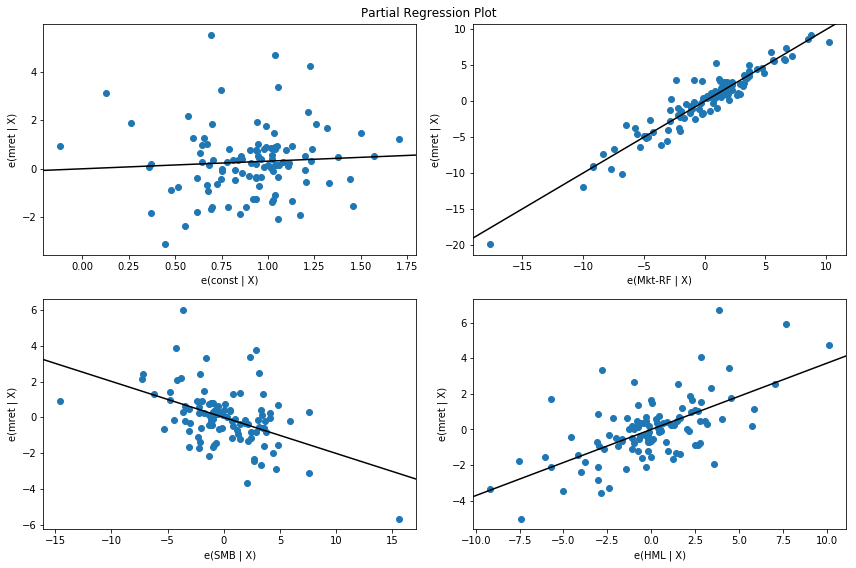

                            OLS Regression Results                            
Dep. Variable:                   mret   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     329.0
Date:                Sun, 15 Apr 2018   Prob (F-statistic):           6.44e-53
Time:                        11:36:40   Log-Likelihood:                -189.06
No. Observations:                 108   AIC:                             386.1
Df Residuals:                     104   BIC:                             396.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3147      0.143      2.195      0.0

In [57]:
regression(bpeqx_df_first)

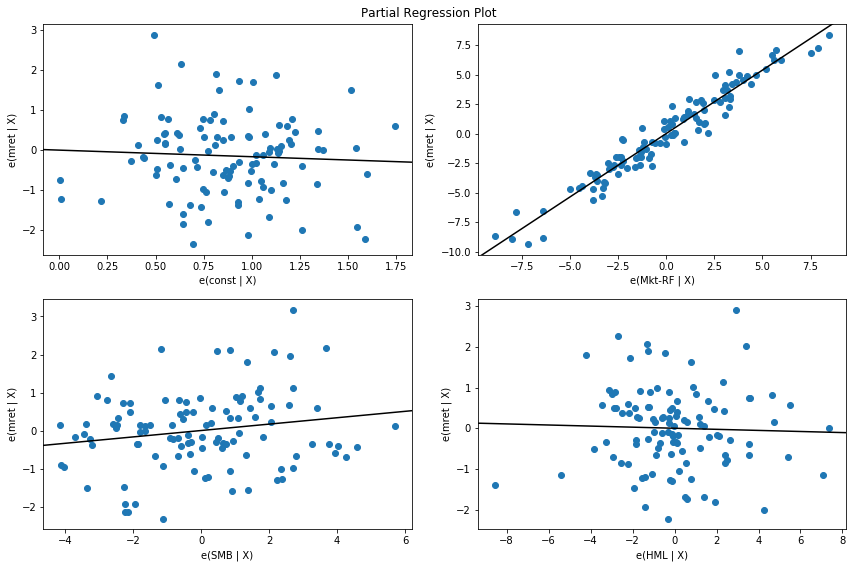

                            OLS Regression Results                            
Dep. Variable:                   mret   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     667.4
Date:                Sun, 15 Apr 2018   Prob (F-statistic):           9.24e-68
Time:                        11:36:42   Log-Likelihood:                -151.19
No. Observations:                 108   AIC:                             310.4
Df Residuals:                     104   BIC:                             321.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1642      0.103     -1.599      0.1

In [58]:
regression(bpeqx_df_second)

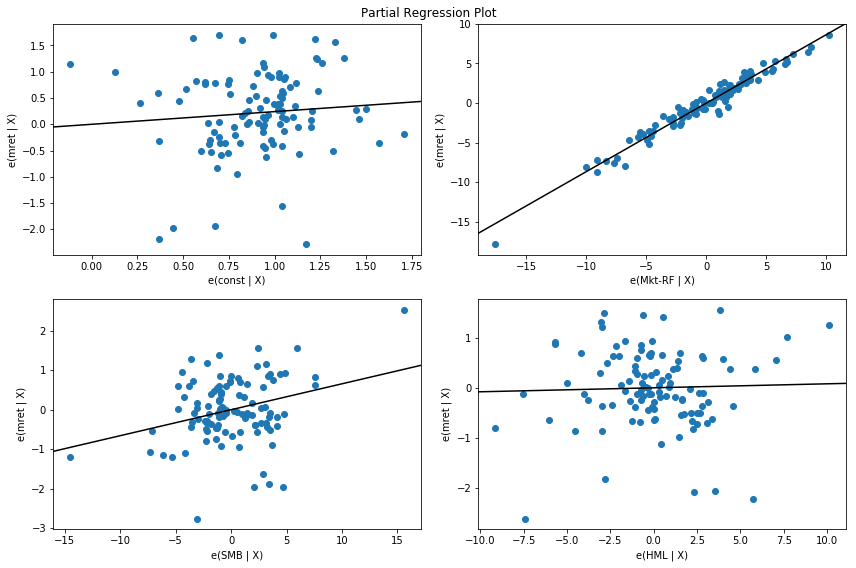

                            OLS Regression Results                            
Dep. Variable:                   mret   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     936.9
Date:                Sun, 15 Apr 2018   Prob (F-statistic):           4.28e-75
Time:                        11:36:43   Log-Likelihood:                -124.72
No. Observations:                 108   AIC:                             257.4
Df Residuals:                     104   BIC:                             268.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2417      0.079      3.059      0.0

In [59]:
regression(fffex_df_first)

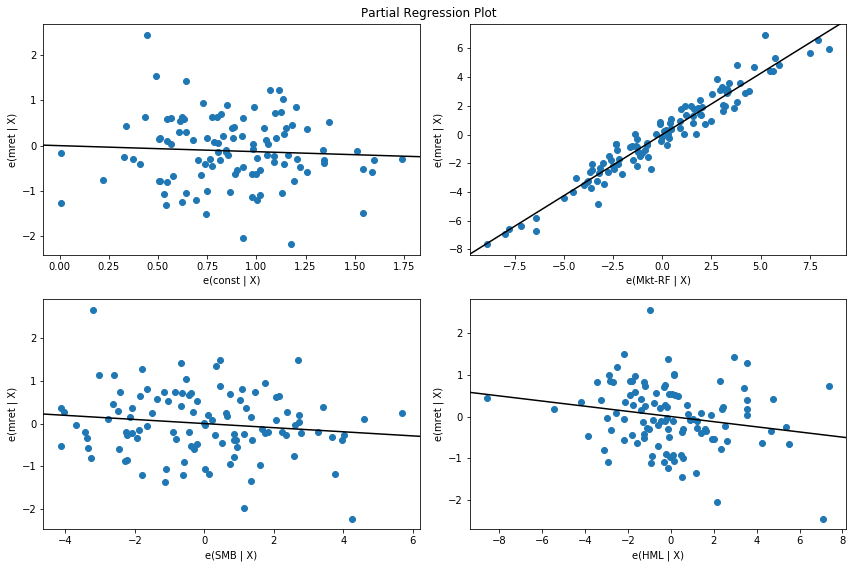

                            OLS Regression Results                            
Dep. Variable:                   mret   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     650.4
Date:                Sun, 15 Apr 2018   Prob (F-statistic):           3.31e-67
Time:                        11:36:44   Log-Likelihood:                -122.55
No. Observations:                 108   AIC:                             253.1
Df Residuals:                     104   BIC:                             263.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1333      0.079     -1.692      0.0

In [60]:
regression(fffex_df_second)

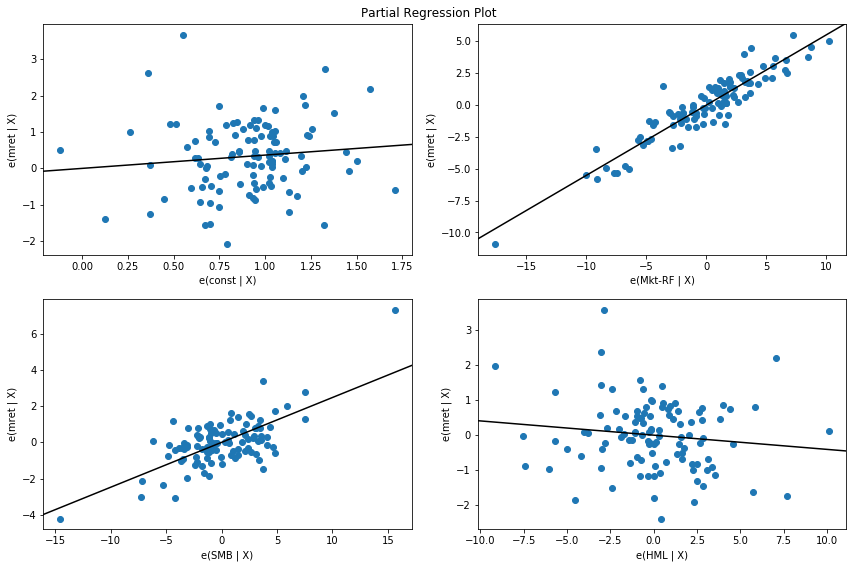

                            OLS Regression Results                            
Dep. Variable:                   mret   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     339.1
Date:                Sun, 15 Apr 2018   Prob (F-statistic):           1.55e-53
Time:                        11:36:46   Log-Likelihood:                -148.32
No. Observations:                 108   AIC:                             304.6
Df Residuals:                     104   BIC:                             315.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3658      0.098      3.721      0.0

In [61]:
regression(fmtix_df_first)

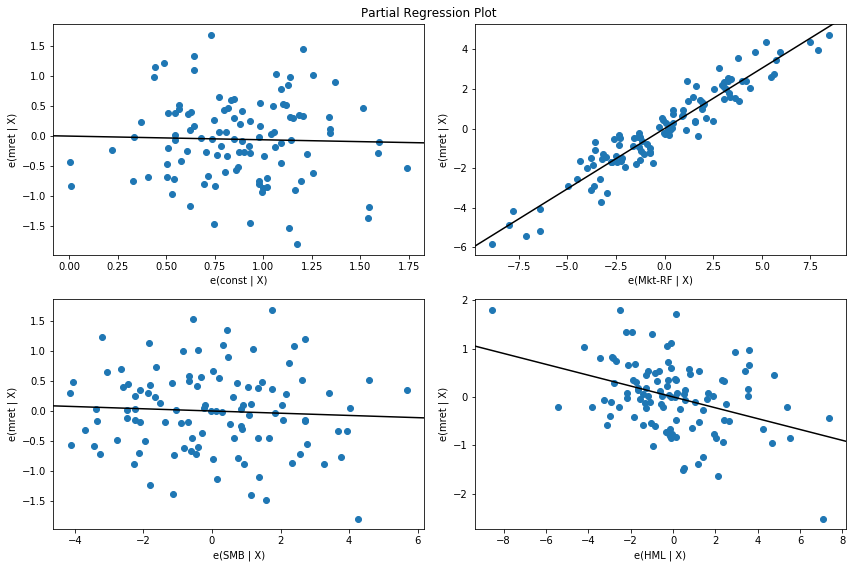

                            OLS Regression Results                            
Dep. Variable:                   mret   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     387.4
Date:                Sun, 15 Apr 2018   Prob (F-statistic):           2.84e-56
Time:                        11:36:53   Log-Likelihood:                -111.87
No. Observations:                 108   AIC:                             231.7
Df Residuals:                     104   BIC:                             242.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0615      0.071     -0.861      0.3

In [62]:
regression(fmtix_df_second)

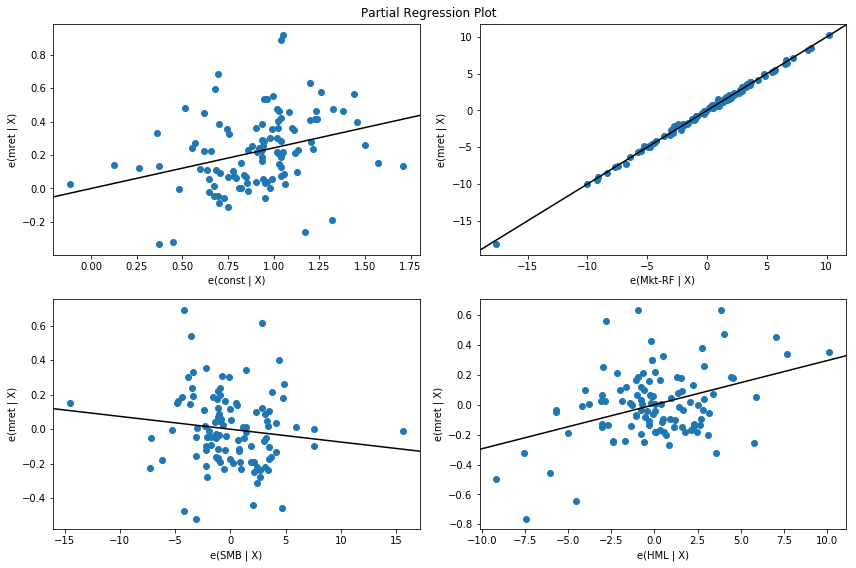

                            OLS Regression Results                            
Dep. Variable:                   mret   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.561e+04
Date:                Sun, 15 Apr 2018   Prob (F-statistic):          7.71e-138
Time:                        11:36:54   Log-Likelihood:                 14.206
No. Observations:                 108   AIC:                            -20.41
Df Residuals:                     104   BIC:                            -9.683
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2430      0.022     11.134      0.0

In [63]:
regression(fstmx_df_first)

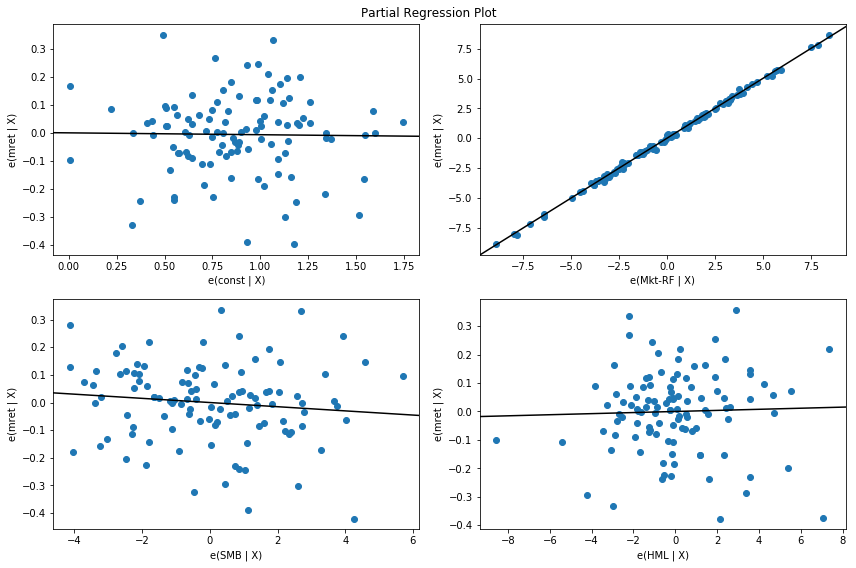

                            OLS Regression Results                            
Dep. Variable:                   mret   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.738e+04
Date:                Sun, 15 Apr 2018   Prob (F-statistic):          1.64e-150
Time:                        11:36:55   Log-Likelihood:                 58.620
No. Observations:                 108   AIC:                            -109.2
Df Residuals:                     104   BIC:                            -98.51
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0067      0.015     -0.452      0.6

In [64]:
regression(fstmx_df_second)

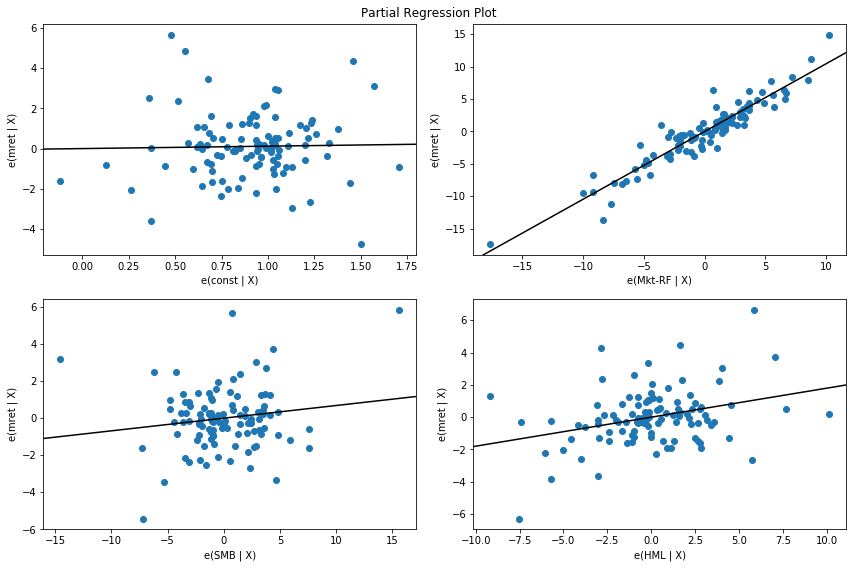

                            OLS Regression Results                            
Dep. Variable:                   mret   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     293.0
Date:                Sun, 15 Apr 2018   Prob (F-statistic):           1.45e-50
Time:                        11:36:57   Log-Likelihood:                -204.02
No. Observations:                 108   AIC:                             416.0
Df Residuals:                     104   BIC:                             426.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1196      0.165      0.727      0.4

In [65]:
regression(gwetx_df_first)

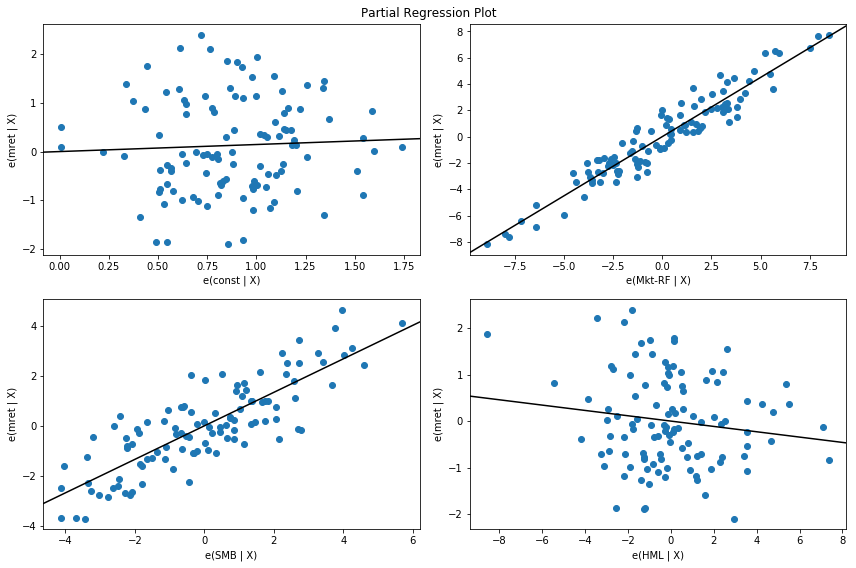

                            OLS Regression Results                            
Dep. Variable:                   mret   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     668.0
Date:                Sun, 15 Apr 2018   Prob (F-statistic):           8.83e-68
Time:                        11:36:58   Log-Likelihood:                -150.75
No. Observations:                 108   AIC:                             309.5
Df Residuals:                     104   BIC:                             320.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1450      0.102      1.417      0.1

In [66]:
regression(gwetx_df_second)

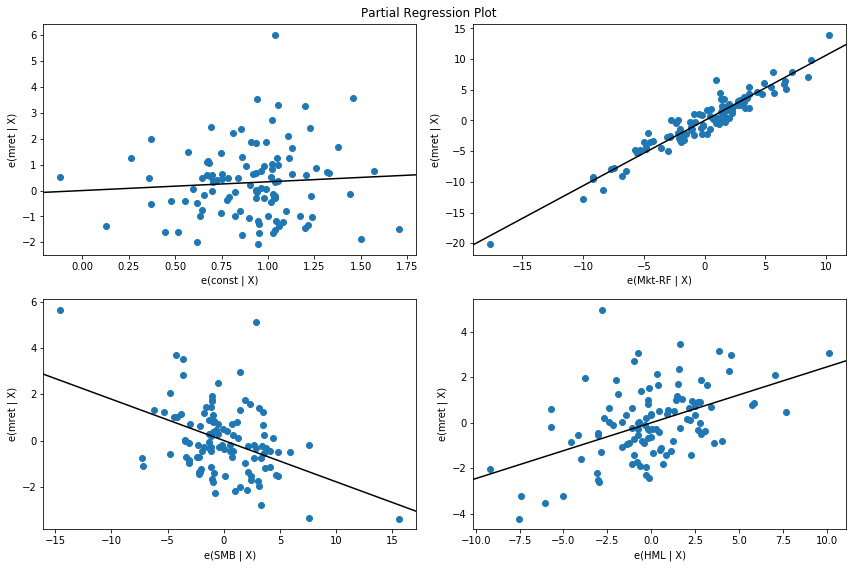

                            OLS Regression Results                            
Dep. Variable:                   mret   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     379.5
Date:                Sun, 15 Apr 2018   Prob (F-statistic):           7.57e-56
Time:                        11:36:59   Log-Likelihood:                -188.20
No. Observations:                 108   AIC:                             384.4
Df Residuals:                     104   BIC:                             395.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3370      0.142      2.370      0.0

In [67]:
regression(nbgux_df_first)

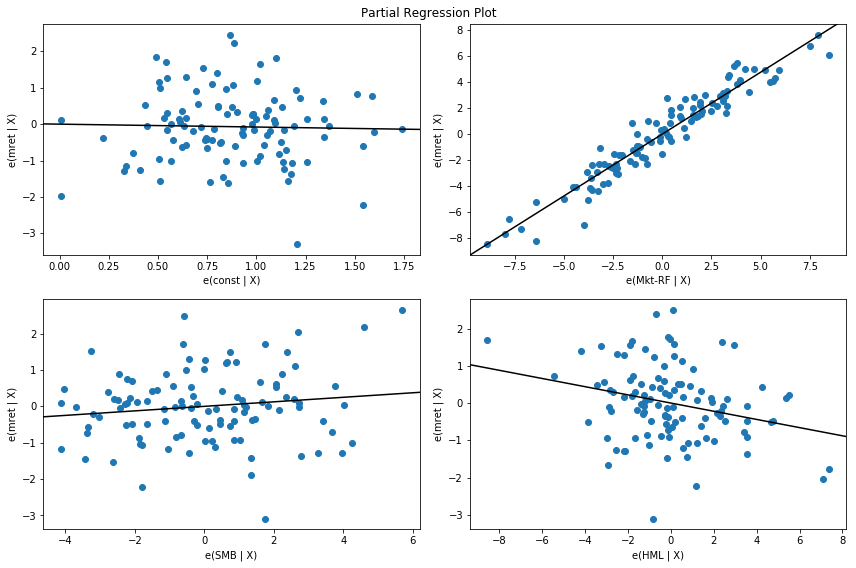

                            OLS Regression Results                            
Dep. Variable:                   mret   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     516.6
Date:                Sun, 15 Apr 2018   Prob (F-statistic):           2.65e-62
Time:                        11:36:59   Log-Likelihood:                -148.86
No. Observations:                 108   AIC:                             305.7
Df Residuals:                     104   BIC:                             316.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0789      0.101     -0.785      0.4

In [68]:
regression(nbgux_df_second)

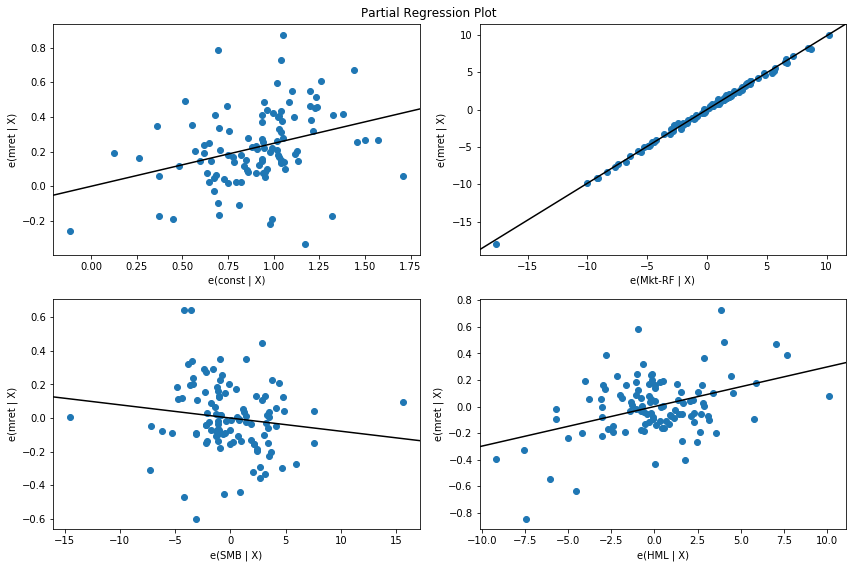

                            OLS Regression Results                            
Dep. Variable:                   mret   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.593e+04
Date:                Sun, 15 Apr 2018   Prob (F-statistic):          2.65e-138
Time:                        11:37:00   Log-Likelihood:                 16.852
No. Observations:                 108   AIC:                            -25.70
Df Residuals:                     104   BIC:                            -14.98
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2478      0.021     11.633      0.0

In [69]:
regression(swtsx_df_first)

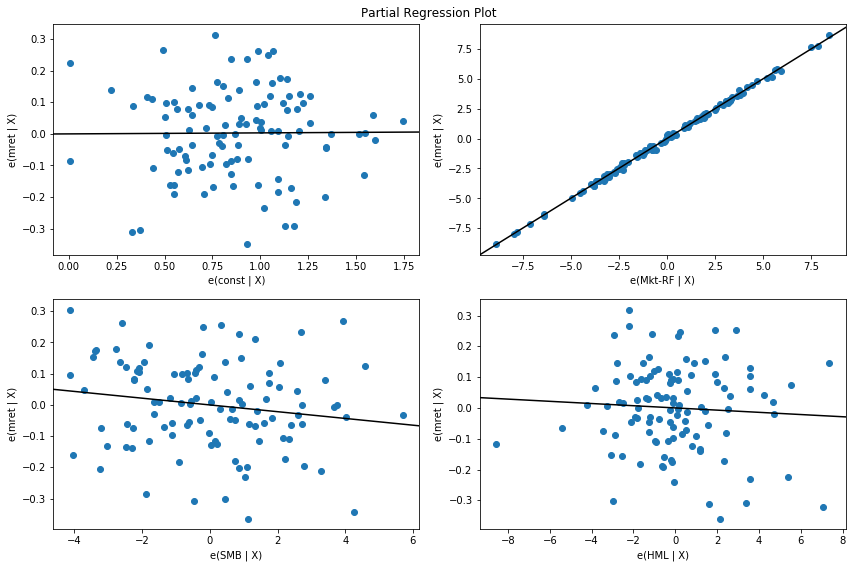

                            OLS Regression Results                            
Dep. Variable:                   mret   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.768e+04
Date:                Sun, 15 Apr 2018   Prob (F-statistic):          9.21e-151
Time:                        11:37:00   Log-Likelihood:                 60.379
No. Observations:                 108   AIC:                            -112.8
Df Residuals:                     104   BIC:                            -102.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0032      0.014      0.221      0.8

In [70]:
regression(swtsx_df_second)

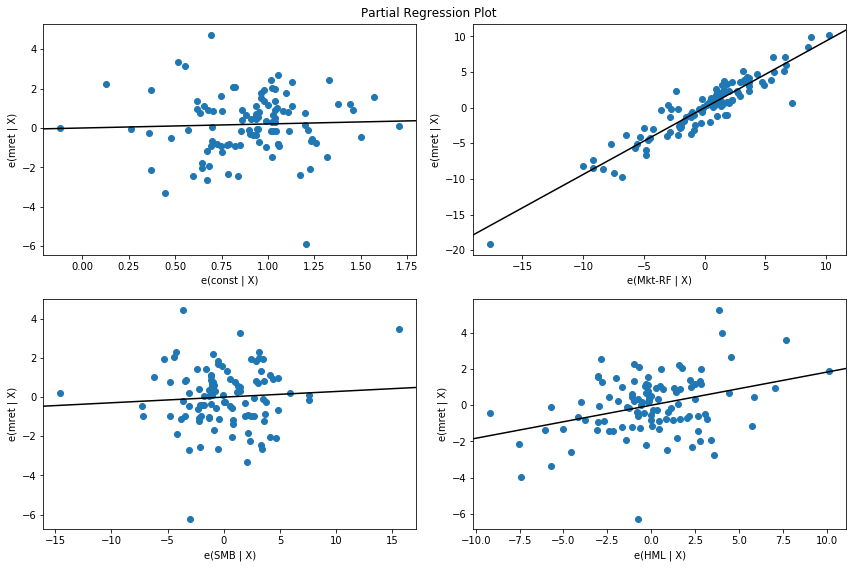

                            OLS Regression Results                            
Dep. Variable:                   mret   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     256.9
Date:                Sun, 15 Apr 2018   Prob (F-statistic):           6.26e-48
Time:                        11:37:01   Log-Likelihood:                -198.03
No. Observations:                 108   AIC:                             404.1
Df Residuals:                     104   BIC:                             414.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2045      0.156      1.313      0.1

In [71]:
regression(tvafx_df_first)

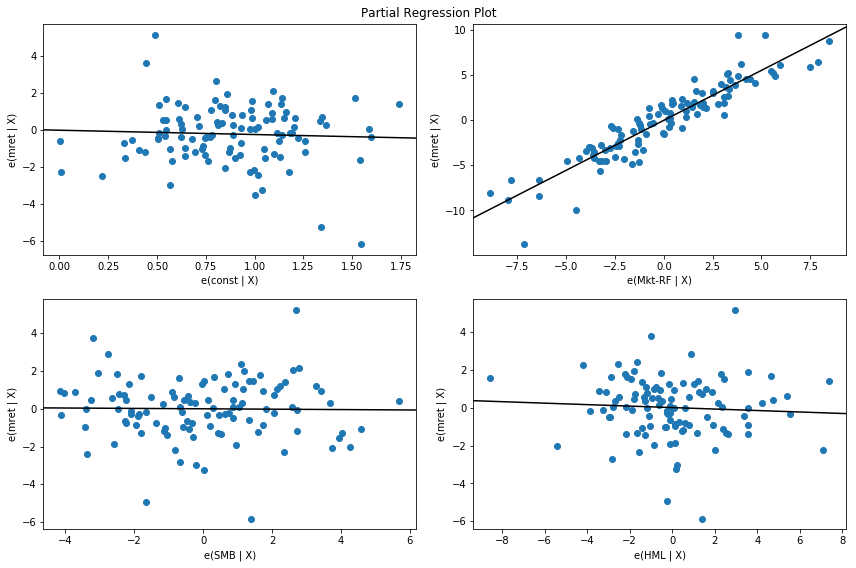

                            OLS Regression Results                            
Dep. Variable:                   mret   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     263.8
Date:                Sun, 15 Apr 2018   Prob (F-statistic):           1.85e-48
Time:                        11:37:01   Log-Likelihood:                -201.75
No. Observations:                 108   AIC:                             411.5
Df Residuals:                     104   BIC:                             422.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2327      0.164     -1.418      0.1

In [72]:
regression(tvafx_df_second)

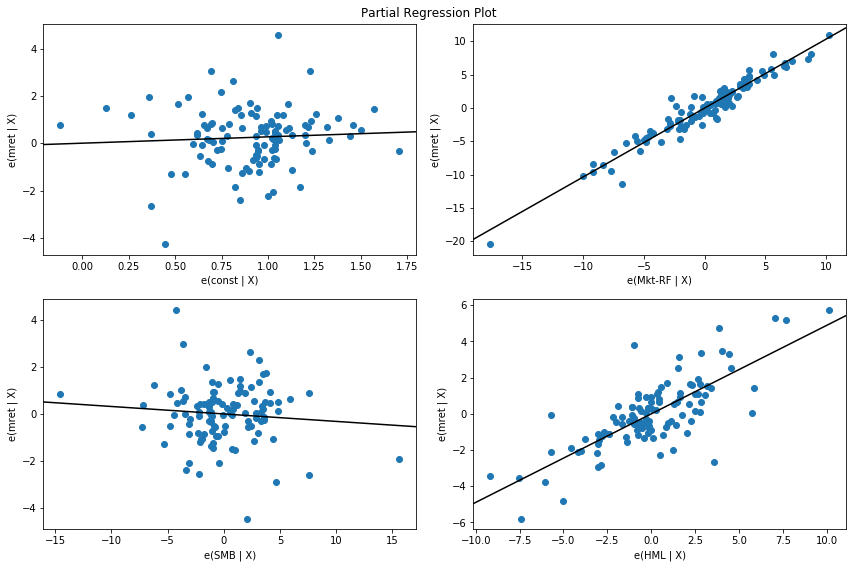

                            OLS Regression Results                            
Dep. Variable:                   mret   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     461.1
Date:                Sun, 15 Apr 2018   Prob (F-statistic):           6.57e-60
Time:                        11:37:01   Log-Likelihood:                -175.18
No. Observations:                 108   AIC:                             358.4
Df Residuals:                     104   BIC:                             369.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2680      0.126      2.126      0.0

In [73]:
regression(vadax_df_first)

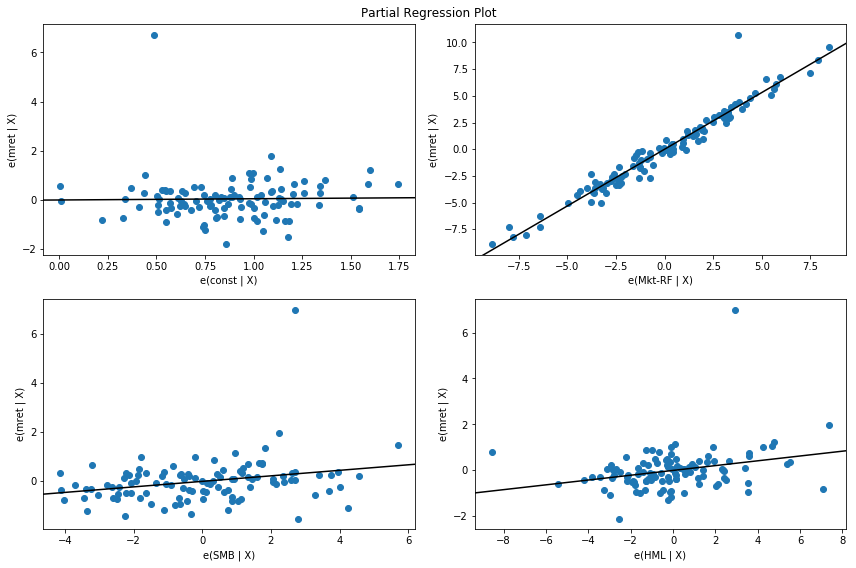

                            OLS Regression Results                            
Dep. Variable:                   mret   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     862.7
Date:                Sun, 15 Apr 2018   Prob (F-statistic):           2.67e-73
Time:                        11:37:02   Log-Likelihood:                -139.78
No. Observations:                 108   AIC:                             287.6
Df Residuals:                     104   BIC:                             298.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0504      0.092      0.545      0.5

In [74]:
regression(vadax_df_second)

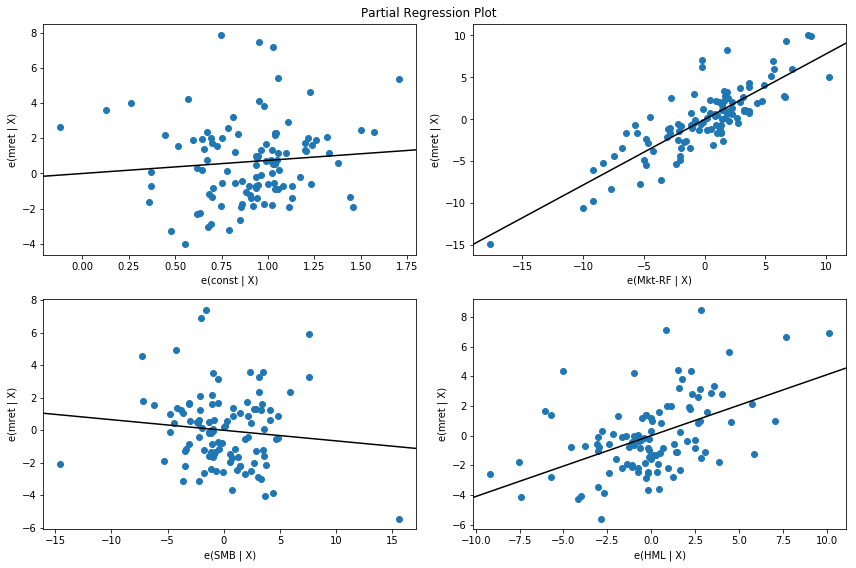

                            OLS Regression Results                            
Dep. Variable:                   mret   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     79.11
Date:                Sun, 15 Apr 2018   Prob (F-statistic):           9.91e-27
Time:                        11:37:02   Log-Likelihood:                -240.47
No. Observations:                 108   AIC:                             488.9
Df Residuals:                     104   BIC:                             499.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7476      0.231      3.240      0.0

In [75]:
regression(yackx_df_first)

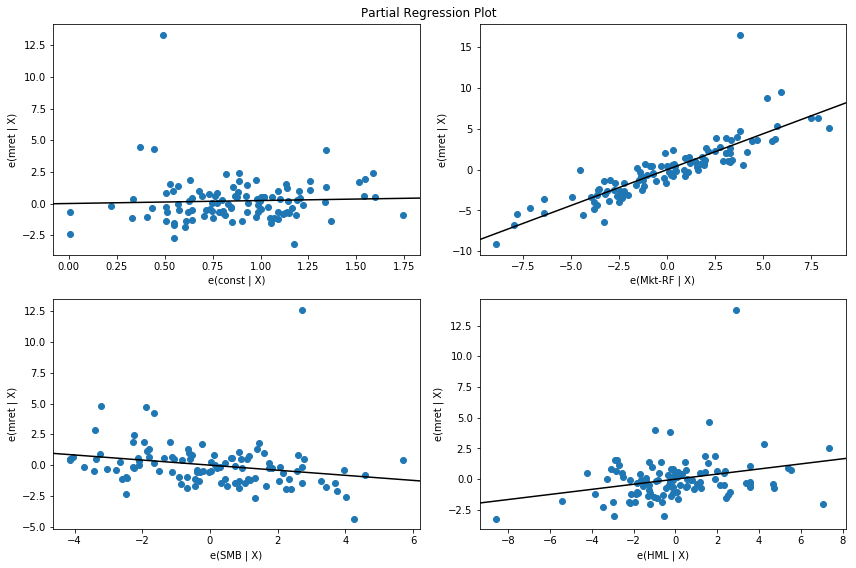

                            OLS Regression Results                            
Dep. Variable:                   mret   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     133.8
Date:                Sun, 15 Apr 2018   Prob (F-statistic):           1.46e-35
Time:                        11:37:03   Log-Likelihood:                -217.92
No. Observations:                 108   AIC:                             443.8
Df Residuals:                     104   BIC:                             454.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2340      0.191      1.228      0.2

In [76]:
regression(yackx_df_second)

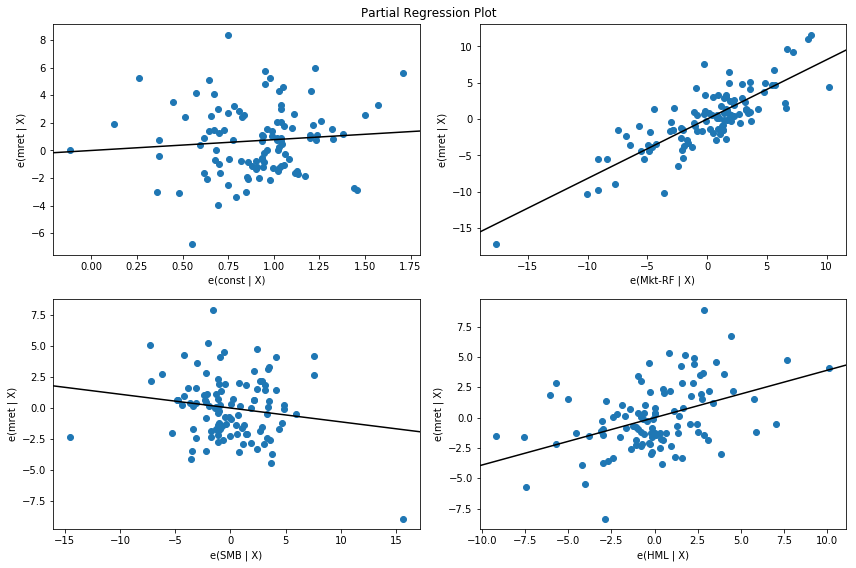

                            OLS Regression Results                            
Dep. Variable:                   mret   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     70.89
Date:                Sun, 15 Apr 2018   Prob (F-statistic):           4.83e-25
Time:                        11:37:03   Log-Likelihood:                -250.95
No. Observations:                 108   AIC:                             509.9
Df Residuals:                     104   BIC:                             520.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7825      0.254      3.077      0.0

In [77]:
regression(yaffx_df_first)

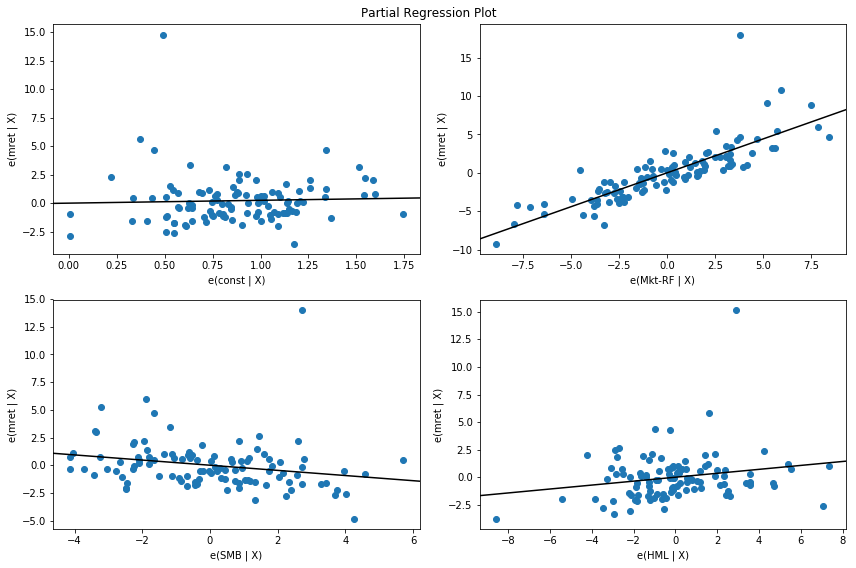

                            OLS Regression Results                            
Dep. Variable:                   mret   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     97.48
Date:                Sun, 15 Apr 2018   Prob (F-statistic):           4.26e-30
Time:                        11:37:03   Log-Likelihood:                -233.88
No. Observations:                 108   AIC:                             475.8
Df Residuals:                     104   BIC:                             486.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2490      0.221      1.127      0.2

In [78]:
regression(yaffx_df_second)

# B) Replicating the holding portfolio return
You are given the “Holding.csv” data, which includes the CUSIP numbers of the end-of-quarter holdings of the Yacktman funds. Convert this into monthly holdings data and merge it with the “Stock_Return.csv” data, which includes the monthly returns of the stocks held by the Yacktman funds. Calculate the monthly returns and the alpha of a strategy that replicates the Yacktman mutual fund by buying the holdings they disclose at the end of each quarter. How do these returns compare with the actual mutual fund returns? 



# B.0. Loading Data

## B.0.1 Quaterly Holding Data

In [79]:
holding_df = pd.read_csv('datasets/Holding.csv')
holding_df

,cusip,shares,tm,date
0,02660910,5630,2000m3,31mar2000
1,03522910,19804,2000m3,31mar2000
2,05981530,110000,2000m3,31mar2000
3,08055510,83000,2000m3,31mar2000
4,08467010,105,2000m3,31mar2000
5,08467020,495,2000m3,31mar2000
6,09367110,158000,2000m3,31mar2000
7,11012210,9990,2000m3,31mar2000
8,15677T10,47600,2000m3,31mar2000
9,17296710,27624,2000m3,31mar2000


In [80]:
holding_df['month'] = pd.to_datetime(holding_df['tm'], format='%Ym%m')

In [81]:
holding_df

,cusip,shares,tm,date,month
0,02660910,5630,2000m3,31mar2000,2000-03-01
1,03522910,19804,2000m3,31mar2000,2000-03-01
2,05981530,110000,2000m3,31mar2000,2000-03-01
3,08055510,83000,2000m3,31mar2000,2000-03-01
4,08467010,105,2000m3,31mar2000,2000-03-01
5,08467020,495,2000m3,31mar2000,2000-03-01
6,09367110,158000,2000m3,31mar2000,2000-03-01
7,11012210,9990,2000m3,31mar2000,2000-03-01
8,15677T10,47600,2000m3,31mar2000,2000-03-01
9,17296710,27624,2000m3,31mar2000,2000-03-01


## B.0.2 Monthly Stock Data

In [84]:
stock_return_df = pd.read_csv('datasets/Stock_Return.csv')

In [85]:
stock_return_df['month'] = pd.to_datetime(stock_return_df['tm'], format='%Ym%m')

In [86]:
stock_return_df

,cusip,tm,permno,ticker,price,ret,month
0,02660910,2000m1,15667,AHP,47.062500,0.199045,2000-01-01
1,03522910,2000m1,59184,BUD,67.500000,-0.047619,2000-01-01
2,05981530,2000m1,77881,BDG,20.750000,-0.023529,2000-01-01
3,08055510,2000m1,65509,BLC,15.875000,-0.167213,2000-01-01
4,08467010,2000m1,17778,BRK,51200.000000,-0.087344,2000-01-01
5,08467020,2000m1,83443,BRK,1646.000000,-0.100546,2000-01-01
6,09367110,2000m1,49373,HRB,43.125000,-0.014286,2000-01-01
7,11012210,2000m1,19393,BMY,66.250000,0.035949,2000-01-01
8,15677T10,2000m1,38914,CEN,16.000000,-0.257971,2000-01-01
9,17296710,2000m1,70519,C,57.000000,0.023569,2000-01-01


## B.1.1 DataFrame Merge

In [87]:
holding_df.index = holding_df.set_index(['month', 'cusip'])

In [88]:
stock_return_df.index = stock_return_df.set_index(['month','cusip'])

In [111]:
holding_stock_df = pd.merge(stock_return_df,holding_df, how='left', on = ['month', 'cusip'] )

In [112]:
holding_stock_df

,cusip,tm_x,permno,ticker,price,ret,month,shares,tm_y,date
0,02660910,2000m1,15667,AHP,47.062500,0.199045,2000-01-01,NaN,NaN,NaN
1,03522910,2000m1,59184,BUD,67.500000,-0.047619,2000-01-01,NaN,NaN,NaN
2,05981530,2000m1,77881,BDG,20.750000,-0.023529,2000-01-01,NaN,NaN,NaN
3,08055510,2000m1,65509,BLC,15.875000,-0.167213,2000-01-01,NaN,NaN,NaN
4,08467010,2000m1,17778,BRK,51200.000000,-0.087344,2000-01-01,NaN,NaN,NaN
5,08467020,2000m1,83443,BRK,1646.000000,-0.100546,2000-01-01,NaN,NaN,NaN
6,09367110,2000m1,49373,HRB,43.125000,-0.014286,2000-01-01,NaN,NaN,NaN
7,11012210,2000m1,19393,BMY,66.250000,0.035949,2000-01-01,NaN,NaN,NaN
8,15677T10,2000m1,38914,CEN,16.000000,-0.257971,2000-01-01,NaN,NaN,NaN
9,17296710,2000m1,70519,C,57.000000,0.023569,2000-01-01,NaN,NaN,NaN


In [113]:
del(holding_stock_df['date'])
del(holding_stock_df['tm_y'])

## B.1.2  NaN filling of holding stock dataframes

In [114]:
holding_stock_df['shares'] = holding_stock_df.groupby(['cusip']).shares.apply(lambda x: x.shift(-2).fillna(holding_stock_df['shares'])) 

In [115]:
holding_stock_df['shares'] = holding_stock_df.groupby(['cusip']).shares.apply(lambda x: x.fillna(method='ffill'))

In [116]:
# test
holding_stock_df.loc[holding_stock_df['cusip'] == '03522910']

,cusip,tm_x,permno,ticker,price,ret,month,shares
1,03522910,2000m1,59184,BUD,67.500000,-0.047619,2000-01-01,19804.0
51,03522910,2000m2,59184,BUD,64.000000,-0.047407,2000-02-01,19804.0
101,03522910,2000m3,59184,BUD,62.250000,-0.027344,2000-03-01,19804.0
151,03522910,2000m4,59184,BUD,70.562500,0.133534,2000-04-01,39608.0
199,03522910,2000m5,59184,BUD,77.500000,0.102569,2000-05-01,39608.0
247,03522910,2000m6,59184,BUD,74.687500,-0.036290,2000-06-01,39608.0
295,03522910,2000m7,59184,BUD,80.500000,0.077824,2000-07-01,39608.0
344,03522910,2000m8,59184,BUD,78.812500,-0.016863,2000-08-01,39608.0
393,03522910,2000m9,59184,BUD,42.312500,0.073751,2000-09-01,39608.0
443,03522910,2000m10,59184,BUD,45.750000,0.081241,2000-10-01,40008.0


## B.1.3 calculate monthly returns and alpha of value weighted portfolio

In [117]:
# rename columns for merging
holding_stock_df.columns = ['cusip', 'tm_x', 'permno', 'ticker', 'price', 'mret', 'date', 'shares']

In [119]:
holding_stock_df = holding_stock_df.reset_index()
ff3factor_df     = ff3factor_df.reset_index()

In [120]:
holding_stock_df = pd.merge(holding_stock_df, ff3factor_df, how='inner', on = ['date'] )

In [126]:
#pd.DataFrame.to_csv(holding_stock_df, 'holding_stock_df.csv')

In [127]:
# return scaling
holding_stock_df['Mkt-RF'] = holding_stock_df['Mkt-RF'] / 100
holding_stock_df['SMB']    = holding_stock_df['SMB']    / 100
holding_stock_df['HML']    = holding_stock_df['HML']    / 100
holding_stock_df['RF']     = holding_stock_df['RF']     / 100

In [129]:
holding_stock_df["value_price"]        = holding_stock_df["price"] * holding_stock_df['shares'] 
holding_stock_df["value_price_return"] = holding_stock_df["price"] * holding_stock_df['shares'] * holding_stock_df['mret']

In [131]:
holding_stock_df.index=holding_stock_df.set_index(['date'])

In [178]:
date_list                               = []
value_weighted_month_return_list        = []
value_weighted_month_excess_return_list = []
value_weighted_month_Mkt_RF_list        = []
value_weighted_month_SMB_list           = []
value_weighted_month_HML_list           = []

for date in np.unique(holding_stock_df["date"]):
    date_list.append(date)    
    value_weighted_month_return                  = holding_stock_df.loc[(holding_stock_df["date"]==date), "value_price_return"].sum() / holding_stock_df.loc[(holding_stock_df["date"]==date), "value_price"].sum()
    value_weighted_month_excess_return           = value_weighted_month_return - holding_stock_df.loc[(holding_stock_df["date"]==date), "RF"].iloc[0]
    value_weighted_month_Mkt_RF                  = holding_stock_df.loc[(holding_stock_df["date"]==date), "Mkt-RF"].iloc[0]
    value_weighted_month_SMB                     = holding_stock_df.loc[(holding_stock_df["date"]==date), "SMB"].iloc[0]
    value_weighted_month_HML                     = holding_stock_df.loc[(holding_stock_df["date"]==date), "HML"].iloc[0]    
    value_weighted_month_return_list.append(       value_weighted_month_return)
    value_weighted_month_excess_return_list.append(value_weighted_month_excess_return)
    value_weighted_month_Mkt_RF_list.append(       value_weighted_month_Mkt_RF)
    value_weighted_month_SMB_list.append(          value_weighted_month_SMB)
    value_weighted_month_HML_list.append(          value_weighted_month_HML)

In [179]:
value_weighted_df                                       = pd.DataFrame()

value_weighted_df["date"]                               = date_list
value_weighted_df.index                                 = pd.DatetimeIndex(value_weighted_df["date"])
value_weighted_df["value_weighted_month_Mkt_RF"]        = value_weighted_month_Mkt_RF_list
value_weighted_df["value_weighted_month_SMB"]           = value_weighted_month_SMB_list
value_weighted_df["value_weighted_month_HML"]           = value_weighted_month_HML_list
value_weighted_df["value_weighted_month_return"]        = value_weighted_month_return_list
value_weighted_df["value_weighted_month_return_excess"] = value_weighted_month_excess_return_list
value_weighted_df["value_weighted_cum_return"]          = (value_weighted_df["value_weighted_month_return"]+1).cumprod()
value_weighted_df["value_weighted_cum_return_excess"]   = (value_weighted_df["value_weighted_month_return_excess"]+1).cumprod()
value_weighted_annual_ret                               = (value_weighted_df["value_weighted_month_return"]+1).cumprod().resample('A').agg('last').pct_change()
value_weighted_annual_ret_excess                        = (value_weighted_df["value_weighted_month_return_excess"]+1).cumprod().resample('A').agg('last').pct_change()
value_weighted_annual_ret_excess_mean                   = value_weighted_annual_ret_excess.mean()
value_weighted_annual_volatility                        = value_weighted_df["value_weighted_month_return_excess"].std() * np.sqrt(12)
value_weighted_sharpe_ratio                             = value_weighted_annual_ret_excess_mean / value_weighted_annual_volatility

### B.1.3.1 Monthly Return

In [195]:
value_weighted_df["value_weighted_month_return"]

date
2000-01-01   -0.038513
2000-02-01   -0.075025
2000-03-01    0.083462
2000-04-01    0.009659
2000-05-01    0.051489
2000-06-01    0.026018
2000-07-01   -0.010949
2000-08-01    0.071685
2000-09-01    0.034846
2000-10-01    0.092370
2000-11-01    0.020389
2000-12-01    0.046555
2001-01-01    0.010641
2001-02-01    0.026193
2001-03-01   -0.029162
2001-04-01    0.054575
2001-05-01    0.040256
2001-06-01    0.008399
2001-07-01    0.038497
2001-08-01    0.000873
2001-09-01   -0.063545
2001-10-01    0.029381
2001-11-01    0.097774
2001-12-01    0.045723
2002-01-01    0.003276
2002-02-01    0.022151
2002-03-01    0.035937
2002-04-01   -0.066675
2002-05-01    0.037233
2002-06-01   -0.113906
                ...   
2014-07-01   -0.017850
2014-08-01    0.043198
2014-09-01   -0.000578
2014-10-01    0.018593
2014-11-01    0.050210
2014-12-01    0.002768
2015-01-01   -0.054185
2015-02-01    0.048864
2015-03-01   -0.029711
2015-04-01    0.008902
2015-05-01    0.000521
2015-06-01   -0.024945
2015-0

### B.1.3.2 Sharpe Ratio

In [181]:
value_weighted_sharpe_ratio

0.7155177827454633

### B.1.3.3 Alpha and Betas

                                 OLS Regression Results                                
Dep. Variable:     value_weighted_month_return   R-squared:                       0.756
Model:                                     OLS   Adj. R-squared:                  0.752
Method:                          Least Squares   F-statistic:                     206.7
Date:                         Sun, 15 Apr 2018   Prob (F-statistic):           5.16e-61
Time:                                 12:35:25   Log-Likelihood:                 473.62
No. Observations:                          204   AIC:                            -939.2
Df Residuals:                              200   BIC:                            -926.0
Df Model:                                    3                                         
Covariance Type:                     nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------

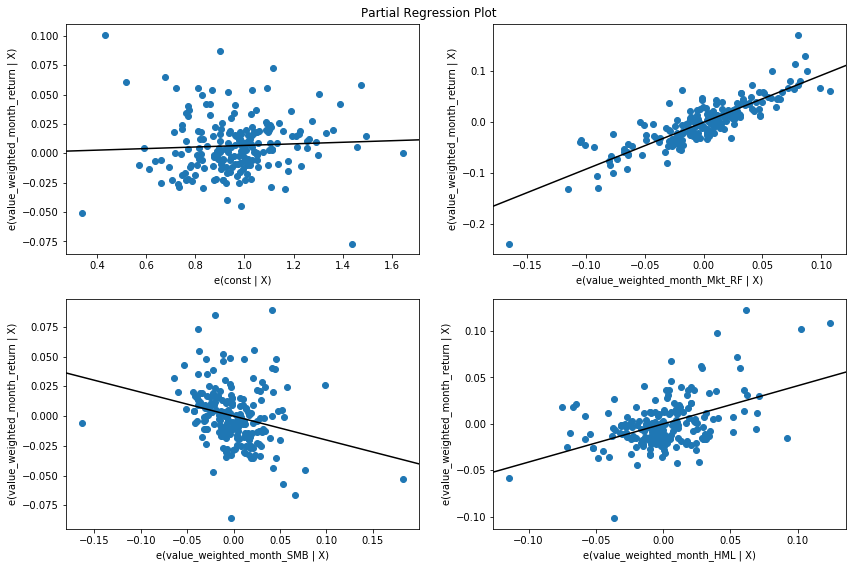

In [191]:
# split dependent and independent variable
y_holding_stock_df = value_weighted_df["value_weighted_month_return"]
X_holding_stock_df = value_weighted_df.iloc[:, [1,2,3]]

# Add a constant to the independent value
X1_holding_stock_df = sm.add_constant(X_holding_stock_df)

# make regression model 
model_holding_stock_df = sm.OLS(y_holding_stock_df, X1_holding_stock_df)

# fit model and print results
results_holding_stock_df = model_holding_stock_df.fit()
        
print(results_holding_stock_df.summary())

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(results_holding_stock_df, fig = fig)
plt.show()